<font size="8">**Introduzione a Spark 4 (con Python)**</font><br>

> (c) 2025 Antonio Piemontese

---
Significato delle **icone** del notebook:

🟥 Errore → un quadrato rosso con ❌

🟩 OK → un cerchio verde con ✔

🟦 Suggerimento → un fumetto blu 💬

🟨 Da chiarire → un triangolo giallo con ❓

🟪 Idea → lampadina viola 💡

🔴 Punto importante → un cerchio rosso con ❗

Set **numeri**: 0️⃣, 1️⃣, 2️⃣,  3️⃣,  4️⃣, 5️⃣, 6️⃣,  7️⃣, 8️⃣, 9️⃣, 🔟

---

Come prima cosa, **rileviamo l'ambiente di esecuzione del notebook** (Jupyter/VSC oppure Google Colab: la cella imposta una variabile booleana `IN_COLAB` che sarà testata da alcune celle del notebook (in particolare quelle di visualizzazione di immagini) per personalizzarne il comportamento a seconda dell'ambiente di esecuzione dell'ambiente rilevato.

In [2]:
# impostazione del TOGGLE BINARIO:
try:
    import google.colab                      # package disponibile SOLO in Google Colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print("Siamo in Colab:", IN_COLAB)


# IMPORT dei package necessari per la VISUALIZZAZIONE delle IMMAGINI (necessari sia in JN che in Colab):
from IPython.display import Image, display   # import dei package di incorporamento e visualizzazione immagine (una tantum)
                                             # Image e display sono entrambi necessari a Jupyter Notebook
                                             # Google Colab utilizza solo Image
import os                                    # necessario a Google Colab per vedere da una cella codice
                                             # i contenuti del 'content'

Siamo in Colab: False


# I big data

Cosa sono i big data?
* [La voce Wikipedia](https://it.wikipedia.org/wiki/Big_data)
* [Le famose 3V](big_data_3V.png)

Una definizione pratica a 3 livelli è [questa](Table_1_1.png). E' una buona regola del pollice.<br>

Python ed R scalano male al crescere dei dati da gestire.<br>
Librerie come *pandas* non sono progettate per dataset che non stanno in memoria.<br>
D'altra parte il [computing distribuito](https://en.wikipedia.org/wiki/Distributed_computing) non è banale:
* i dati devono essere partizionati tra i differenti nodi del cluster; quindi gli algoritmi che utilizzano molto i dati patiscono le **latenze di rete** e comunque i **network transfer rate** sono inferiori di diversi ordini di grandezza rispetto agli accessi in RAM;
* mano a mano che il numero di nodi coinvolti in un processo cresce, la probabilità di **failure** di un nodo (e quindi del processo) cresce in modo proporzionale;
* l'applicazione deve essere progettata sin dall'inizio in modo **parallelizzabile** (sia come codice che come dati).

Un modo semplice per immaginare i sistemi distribuiti è come un gruppo di computer indipendenti che appaiono all'utente finale come un singolo computer. Consentono lo **scaling orizzontale**. Ciò significa aggiungere più computer/cpu anziché fare upgrade del singolo sistema (**scaling verticale**). Quest'ultimo è relativamente costoso e spesso insufficiente per grandi carichi di lavoro. I sistemi distribuiti sono ottimi in termini di scalabilità ed affidabilità, ma rendono **più complesse** la progettazione, l'implementazione ed il debug del codice. E' importante comprendere **questo compromesso** prima di optare per uno strumento del genere.

# Soluzioni per big data in Python


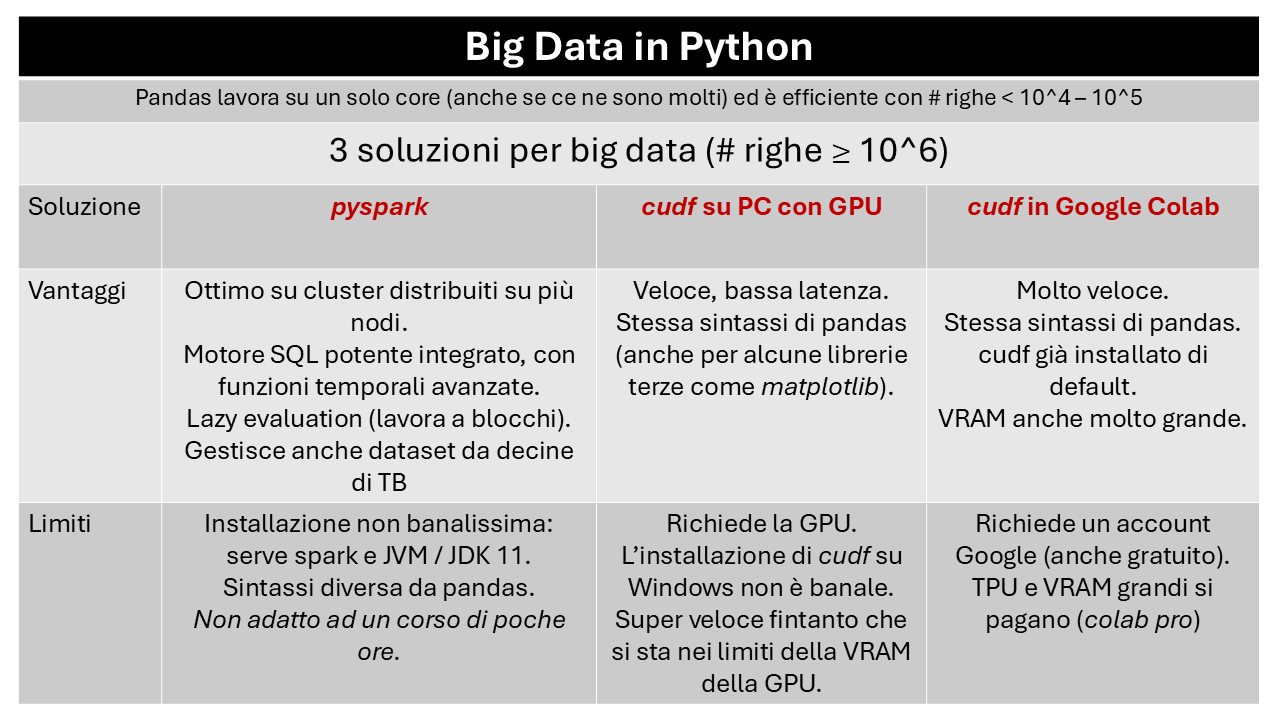

In [111]:
Image('cudf_vs_pyspark.png') if IN_COLAB else display(Image(filename='programma_aula_mediolanum_TS.png'))

# La framework Apache Spark

Apache Spark è una **framework open-source** nata a Berkeley, e poi donata alla fondazione Apache.<br>
Il nome (`Spark` = *scintilla*) vuole rimarcare gli obiettivi iniziali del progetto: **computazione veloce ed interattiva**.

---

❗ Prima major release nel 2016, la major release **Spark 3** è uscita nel 2020, **a maggio del 2025 è uscito Spark 4**, **a settembre 2025 è uscito 4.0.1**, vedi [qui](https://spark.apache.org/downloads.html).<br>
Sempre da settembre 2025 è disponibile la **3.5.7.**, una evoluzione della consolidata serie 3.5.<br>
Dal sito Spark (a novembre 2025):

---

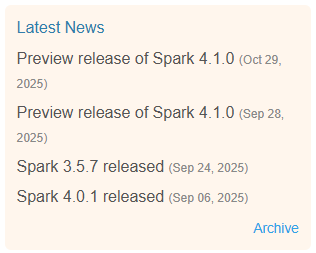

In [5]:
Image('spark_releases.png') if IN_COLAB else display(Image(filename='spark_releases.png'))

Apache Spark è stata la **prima framework open-source** che ha reso la programmazione distribuita realmente fruibile ai data scientist.<br>
Ecco le sue componenti:

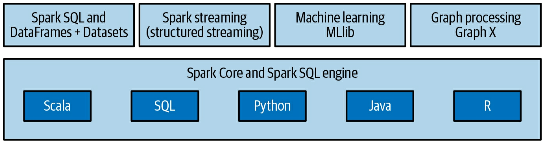

In [6]:
Image('Figure_1_1.png') if IN_COLAB else display(Image(filename='Figure_1_1.png'))

Vediamo l'architettura di *Spark* più in dettaglio, con <u>l'aggiunta delle possibili sorgenti dati e dei possibili environment</u> (vedi più avanti):

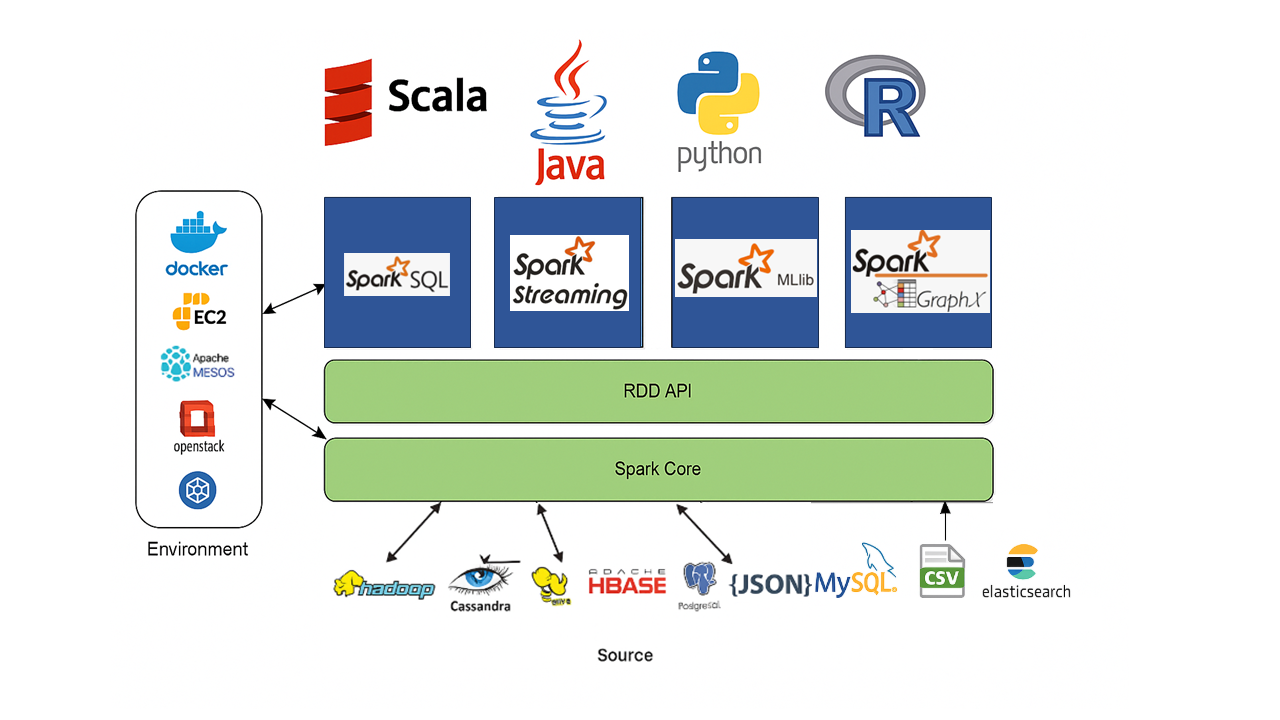

In [7]:
Image('spark_ecosystem3.png') if IN_COLAB else display(Image(filename='spark_ecosystem3.png'))

dove:
* *Spark SQL and DataFrames + Datasets*: il modulo per lavorare con dati strutturati (tabellari)
* *MLlib*: una libreria di Machine Learning scalabile
* *Structured Streaming*: per realizzare applicazioni in streaming scalabili e fault-tolerant
* *GraphX (legacy)*: la libreria di Apache Spark per l'uso dei [grafi](https://it.wikipedia.org/wiki/Grafo). Per le applicazioni di [graph analytics](https://www.nvidia.com/en-us/glossary/data-science/graph-analytics/#:~:text=Graph%20analytics%2C%20or%20Graph%20algorithms,the%20graph%20as%20a%20whole.), comunque, si raccomanda l'uso di [*GraphFrames*](https://graphframes.github.io/graphframes/docs/_site/index.html) anzichè di GraphX, che non è mantenuto in modo attivo ed è carente per Python.

Altre fonti:<br>
[Spark secondo Apache](https://spark.apache.org/)<br>
[Spark secondo Wikipedia](https://it.wikipedia.org/wiki/Apache_Spark)

---

Come riportato da Wikipedia IT:
> A differenza del paradigma `MapReduce`, il predecessore di Spark, basato sul disco a due livelli di `Hadoop`, le **primitive "in-memory" multilivello** di Spark forniscono prestazioni fino **a 100 volte migliori** per talune applicazioni<sup>1</sup>.

<small><sup>1</sup>*Reynold Xin, Josh Rosen, Matei Zaharia, Michael Franklin, Scott Shenker e Ion Stoica, Association for Computing Machinery, Shark: SQL and Rich Analytics at Scale (PDF), SIGMOD '13, New York, 22-27 giugno 2013. URL consultato il 29 agosto 2017 (archiviato dall'url originale il 9 agosto 2017).*</small>

Spark vs [MapReduce](https://it.wikipedia.org/wiki/MapReduce):
* [Hadoop](https://it.wikipedia.org/wiki/Apache_Hadoop) è un <u>file system distribuito per big data</u>; MapReduce di Apache Hadoop ha rivoluzionato la elaborazione dei grandissimi dataset (*huge dataset*) offrendo un <u>modello</u> semplice e flessibile per scrivere programmi che possono essere **eseguiti in parallelo su centinaia o migliaia di macchine**. MapReduce divide il task in piccoli task che possono essere eseguiti su macchine differenti e la cui failure può essere gestita comodamente.
* Spark **estende MapReduce per 3 aspetti**: l'engine esegue un [grafo aciclico diretto](https://en.wikipedia.org/wiki/Directed_acyclic_graph) degli operatori (sul tipo di TensorFlow - vedi [questo esempio](DAG_example.png) relativo alla formula: [(a+b) x c] + [(a+b) + e]); offre un set di trasformazioni più ampio; permette l'elaborazione **in memoria**
* inoltre, Spark <u>disaccoppia lo storage e l'elaborazione</u> (a differenza di Hadoop); cioè, possiamo usare Spark per leggere dati memorizzati su molte sorgenti: Apache Hadoop, [Apache Cassandra](https://it.wikipedia.org/wiki/Cassandra_(database)), [Apache Hbase](https://it.wikipedia.org/wiki/HBase), [MongoDB](https://it.wikipedia.org/wiki/MongoDB), [Apache Hive](https://it.wikipedia.org/wiki/Apache_Hive), RDBMS, ecc. Spark gestisce tutte queste sorgenti dati *in-memory*!
* tramite le [API](https://it.wikipedia.org/wiki/Application_programming_interface) *DataFrameReader* e *DataFrameWriter*, inoltre, permettono di accedere anche altre sorgenti dati, come: [Apache Kafka](https://it.wikipedia.org/wiki/Apache_Kafka), [Amazon Kinesis](https://en.wikipedia.org/wiki/Amazon_Kinesis), Azure Storage, [Amazon S3](https://it.wikipedia.org/wiki/Amazon_S3).

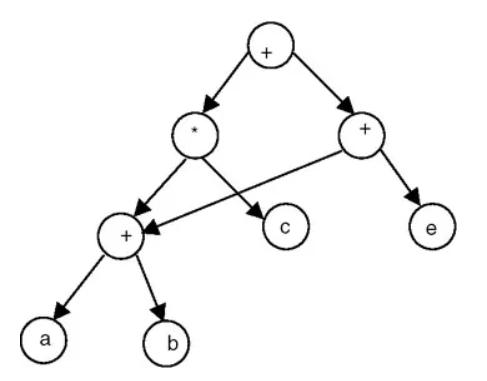

In [9]:
Image('DAG_example.png') if IN_COLAB else display(Image(filename='DAG_example.png'))

# L'ecosistema Spark

Intorno a Spark è cresciuto negli anni un **ecosistema**, fatto di *community* di utenti e sviluppatori, di software di terze parti, di conferenze e meet-up locali, ecc. Seguono alcune slide di descrizione di tale ecosistema (per la parte software):

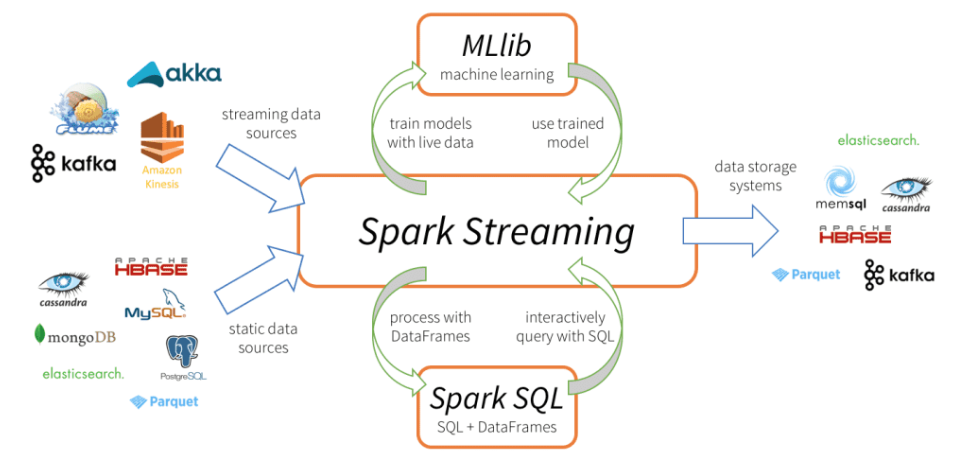

In [8]:
Image('spark_ecosystem2.png') if IN_COLAB else display(Image(filename='spark_ecosystem2.png'))

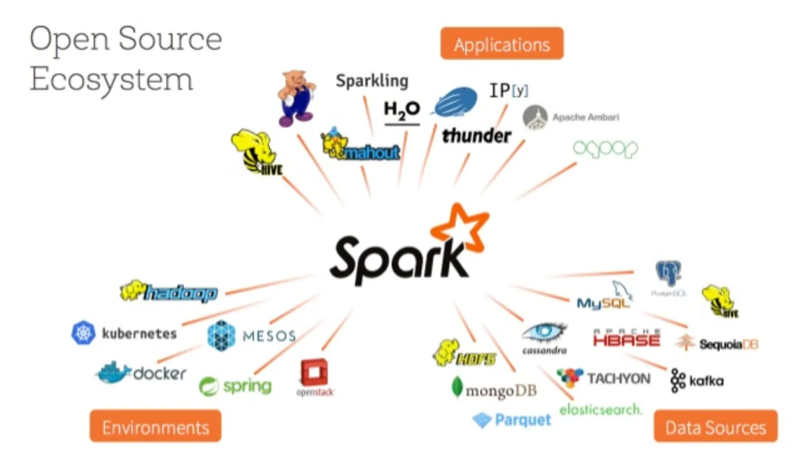

In [10]:
Image('spark_ecosystem.png') if IN_COLAB else display(Image(filename='spark_ecosystem.png'))

# Le release di Spark

**Spark Release 3.0**:<br>
* non introduce importanti cambiamenti funzionali alle API (rispetto alla versione 2);
* si focalizza sulla <u>performance ed usabilità</u>, che sono migliorate;

* il modulo maggiormente migliorato è *SparkSQL*: l'esecuzione adattiva delle query ed il pruning dinamico di partizione permettono a Spark di adattare <u>in tempo reale il query plan</u> e <u>saltare i dati</u> che non sono richiesti come risultato della query;

* questi miglioramenti fanno risparmiare agli utenti parecchio tempo nel tuning della query ed ottimizzazione del query plan;
* Spark 3.0 è circa <u>2 volte più veloce di Spark 2.4</u> nell'esecuzione del benchmark di elaborazione analitica [TPC-DS](https://www.tpc.org/tpcds/);

* poichè la maggior parte delle applicazioni Spark utilizzano l'engine SQL, ne traggono beneficio tutte le librerie di alto livello, includendo MLlib e lo streaming strutturato, e tutte le API, includendo SQL e DataFrames;
* Spark 3.0 è conforme allo [standard ANSI SQL](https://blog.ansi.org/2018/10/sql-standard-iso-iec-9075-2016-ansi-x3-135/#gref), e cioè lo rende più usabile;
* Spark è progettato per i big data, non per l'estetica. Molti output sono essenziali e poco attraenti dal punto di vista grafico. All'estremo opposto ci sono tool come [*Orange*](https://orangedatamining.com/), eccellenti per la parte grafica ma deboli con volumi di quantità medio-grandi;
Spark & Java Virtual Machine
* *[Java Virtual Machine (JVM)](https://it.wikipedia.org/wiki/Macchina_virtuale_Java) can be considered as middleware between Java-based applications like Spark and operating systems where it is running. As Spark is written mostly in Scala, it can not work without JVM on the computer where it is running.*

---

**Spark Release 4.0.0**

Apache Spark 4.0.0 segna **una pietra miliare** importante come primo rilascio della **serie 4.x**, che incarna lo sforzo collettivo della vivace community open-source. Questo rilascio è la prova di una collaborazione straordinaria: sono stati risolti **oltre 5100 ticket con contributi da più di 390 persone**.

***Spark Connect*** continua ad avanzare rapidamente, offrendo miglioramenti significativi:

* Un nuovo client Python leggero (**pyspark-client**) di soli 1,5 MB.
* Un ulteriore pacchetto di rilascio con Spark Connect abilitato di default.
* Piena compatibilità API per il client Java.
* Una nuova configurazione `spark.api.mode` per attivare/disattivare facilmente Spark Connect nelle tue applicazioni.
* Copertura API notevolmente ampliata.
* ML su Spark Connect.
* Una nuova implementazione di client per Swift.

***Spark SQL*** è stato arricchito in modo significativo con nuove potenti funzionalità progettate per aumentare l’espressività e la versatilità dei carichi SQL, come il supporto al tipo di dato **VARIANT**, le funzioni SQL definite dall’utente, le variabili di sessione, la sintassi *pipe* e la collazione delle stringhe.

***PySpark*** continua a ricevere attenzione sia in termini di ampiezza funzionale sia di esperienza d’uso per gli sviluppatori, introducendo **una API nativa per il plotting, una nuova Python Data Source API, il supporto alle UDTF Python e il profiling unificato per le UDF PySpark**, insieme a numerosi altri miglioramenti.

***Structured Streaming*** evolve con aggiunte chiave che offrono maggiore controllo e facilità di debugging, in particolare l’introduzione della **Arbitrary State API v2** per una gestione dello stato più flessibile e della **State Data Source** per un debugging più semplice.


---

**E' meglio usare la 4.0.1 o la 3.5.7.?** (*chatGPT5*)

Dipende da dove si mette Spark, ma “in generale, oggi” la risposta è questa:

1. **Se si parte da zero e si può scegliere liberamente → 4.0.1.**
   È l’ultima stabile del ramo nuovo, hanno già fatto il primo giro di bugfix, e tutta la documentazione “latest” ora punta lì. <sup>1</sup>

2. **Se si è in un ambiente già in produzione che è rimasto su 3.5.x → 3.5.7.**
   È il maintenance più recente del ramo 3.5 e serve proprio a chi non può/pensa di non poter fare subito il salto al 4.x (compatibilità, vendor, cluster vecchi, ecc.).<sup>2</sup>

3. **Cosa guardare per decidere davvero**

   * connettori / librerie di terze parti: supportano già 4.0?
   * runtime dove lo si deve mettere (Dataproc, EMR, Kubernetes operator): hanno già l’immagine 4.0.x?
   * team: userà Spark Connect / le novità SQL di 4.0? Se sì, ha senso andare dritto lì. <sup>3</sup>

Quindi versione consigliata “oggi”: **Apache Spark 4.0.1**, salvo vincoli di piattaforma.

<small><sup>1</sup>*https://spark.apache.org/downloads.html?utm_source=chatgpt.com*</small><br>
<small><sup>2</sup>*https://spark.apache.org/releases/spark-release-3-5-7.html?utm_source=chatgpt.com*</small><br>
<small><sup>3</sup>*https://spark.apache.org/releases/spark-release-4-0-1.html?utm_source=chatgpt.com*</small>


# PySpark

[**PySpark**](https://spark.apache.org/docs/latest/api/python/) è l'API di Spark per Python, ed è quella che useremo per il codice degli esempi di questo corso.<br>
E' un <u>wrapper Python</u> della framework Spark, è scritto principalmente in [Scala](https://it.wikipedia.org/wiki/Scala_(linguaggio_di_programmazione)), che, come noto, [gira sulla JVM](https://www.educative.io/courses/learn-scala-from-scratch/39BnN6DMZxr).<br>

![](icone_pyspark.png)

* Python è il linguaggio più usato nella Data Science e nel Machine Learning; di conseguenza, PySpark è la API di Spark più usata;
<br><br>
* su [PyPI](https://pypi.org/) (il Python Package Index, l'equivalente del [CRAN](https://cran.r-project.org/) in R), PySpark ha più di 5 milioni di download al mese;
* le versioni Python prima della 3.6 sono state deprecate; da Spark 3.2, anche la versione Python 3.6 è stata deprecata (come supporto); verificare la versione di Python installata sul proprio PC con il comando: *import sys; print(sys.version)*
* PySpark permette di gestire al meglio gli aspetti critici della analitica complessa su *huge data*, in particolare: il **pre-processing** (ne vedremo un esempio); **le iterazioni**, usate da molti algoritmi di Machine Learning e Deep Learning (ad esempio la [discesa stocastica del gradiente](https://it.wikipedia.org/wiki/Discesa_stocastica_del_gradiente)); la **pipeline** dei modelli (dal pre-processing alla valutazione del modello);
* si può utilizzare un ambiente [REPL](https://it.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop), evitando l'andata-ritorno con le IDE (ad esempio *Jupyter* oppure *PyCharm*) oppure il loop edit-compile-run-debug. *Un read-eval-print loop è un ambiente di programmazione dove gli input utente sono letti ed elaborati, e quindi i risultati sono restituiti all'utente*. Per REPL vs Interprete, vedi [qui](https://stackoverflow.com/questions/5451042/relation-between-repl-interpreter-and-compiler);
* il REPL si attiva da anaconda prompt con: *pyspark*; in questo corso, tuttavia, utilizzeremo prevalentemente Jupyter;
* PySpark fornisce **interoperabilità con *pandas*** (come vedremo più avanti)


***Spark*** vs ***PySpark*** vs ***SparkSQL***: non confondere (frequente!):
* *Spark*: una framework di elaborazione distribuita per grandi dataset scritta principalmente nel linguaggio Scala. La framework offre le [API](https://it.wikipedia.org/wiki/Application_programming_interface) per differenti linguaggi, costruite *on the top* di Spark
* *PySpark*: la API di Spark per Python. E' un wrapper del core di Spark per Python
* *SparkSQL*: un modulo Spark per l'elaborazione dei dati strutturati (tabellari), accedibile de tutte le API di Spark e dunque anche da PySpark (vedi il link precedente a *PySpark*).

# L'installazione di Spark e PySpark

Ora **installiamo** *PySpark* sulla nostra macchina (da [qui](https://spark.apache.org/downloads.html)) e **configuriamolo** in modo da poter iniziare a eseguire l'analisi dei dati. E' un'attività *una tantum*.

Prima di installare spark, pyspark, python, java, ecc è bene disinstallare e pulire tutto?<br>
Non è obbligatorio azzerare tutto prima di usare Spark/PySpark, ma se negli ultimi giorni ci sono stati molti tentativi, versioni miste di Python/Java, variabili d’ambiente sovrascritte, una “mezza formattazione” mirata aiuta molto a evitare problemi.

Vedi Word "Disinstallazione preliminare".

---
1️⃣ **Le versioni di *Spark*** oggi disponibili:<br>

![](spark_versions.png)

❗ Scegliamo0 la **4.0.1.** per sfruttare i vantaggi della versione 4 già assestata 6 mesi dopo nella 4.0.1.

---

2️⃣ **I tipi di package** disponibili (cioè per quali versioni di hadoop Spark è stato compilato):<br>

![](package_types.png)

Vediamo il loro significato:

**1. Pre-built for Apache Hadoop 3.4 and later**

Questo è il pacchetto già compilato e pronto per essere usato con Hadoop 3.4 o versioni successive.<br>
L’utente lo può scaricare e avviare senza dover compilare nulla. **È l’opzione “standard”** per chi non ha esigenze particolari.

**Serve quando:** l’utente vuole far partire Spark rapidamente in un ambiente recente.

**2. Pre-built for Apache Hadoop 3.4 and later with Spark Connect enabled**

È lo stesso pacchetto di prima, ma con **Spark Connect già abilitato**.<br>
In questo modo l’utente può usare i client leggeri (Python, Swift, ecc.) senza dover cambiare configurazioni o ricompilare.

**Serve quando:** l’utente sa già che userà Spark Connect e vuole tutto pronto.

**3. Pre-built with user-provided Apache Hadoop**

Anche questo è precompilato, ma **non porta dentro le librerie Hadoop**: si aspetta che nel sistema siano già presenti quelle del cluster/ambiente dell’utente (per esempio un Hadoop aziendale o di un vendor).<br>
Così si evitano conflitti di versione tra i jar di Spark e quelle del cluster.

**Serve quando:** l’utente è in un ambiente dove le librerie Hadoop le fornisce il cluster e non vanno sovrascritte.

**4. Source Code**

Qui viene fornito solo il **codice sorgente**. L’utente deve compilarlo (“buildarlo”) per ottenere i pacchetti.<br>
È l’opzione più flessibile, ma anche la più tecnica.

**Serve quando:** l’utente vuole una combinazione non standard (altra versione di Hadoop, feature particolari) o in azienda si richiede di costruire i binari internamente.

**In pratica**:

* **Non so / sto iniziando** → *Pre-built for Apache Hadoop 3.4 and later*
* **Voglio provare Spark Connect subito** → *…with Spark Connect enabled*
* **Ho un Hadoop “di casa” e non voglio conflitti** → *Pre-built with user-provided Apache Hadoop*
* **Sono un maniaco del build o devo allineare le versioni** → *Source Code*


❗ Scegliamo *Pre-built for Apache Hadoop 3.4 and later*.

---

3️⃣ Ora, scarichiamo il pacchetto Spark prima selezionato (è nel formato compresso *tgz* <sup>1</sup>)<br>
Quando il download è terminato:
1. copiamo il nome del pacchetto scaricato (ad esempio selezionando il pacchetto nella cartella *Downloads* --> tasto destro del mouse --> *Rinomina* --> Ctrl-C) - ad esempio: `spark-4.0.1-bin-hadoop3`
2. sotto il path `C:/Utenti/<Utente>` - <u>o anche semplicemente sotto `C:/`</u> - creiamo una cartella di nome `spark-4.0.1-bin-hadoop3` (o quello che è... <sup>2</sup>)
3. nella cartella *Downloads* facciamo doppio click sul pacchetto TGZ scaricato (oppure apriamolo con *7-zip* oppure *WinRAR*) --> la finestra ci mostra ora una cartella con il pacchetto in formato *RAR*
4. estraiamo il pacchetto nella cartella creata al passo 2
5. in questa cartella facciamo ora doppio click sul pacchetto TAR (oppure apriamolo con *7-zip* oppure *WinRAR*) e quindi estraiamo i contenuti (nella cartella stessa). Dovremmo ottenere questo albero:<br>

    <small><sup>1</sup>*E' un'estensione di file che indica un archivio compresso, comunemente usato in sistemi operativi come Linux e macOS. Se Windows non riconosce il tipo file: selezionare il file--> tasto destro del mouse --> "Apri con", scegliere *7-zip* oppure *WinRAR*, fare check su "Usa sempre questa app per aprire i file .tgz"*</small><br>
    <small><sup>2</sup>*E' consigliabile che Spark sia installato in un percorso senza spazi, in genere all'inizio dell'albero. Gli script di Spark spesso soffrono con gli spazi.*</small><br>

    ![](spark_tree.png)
6. Puliamo il cammino, in questo modo (da Explorer):<br>

    6.1. Rinominiamo la cartella più interna in `spark`<br>
    In questo momento il percorso potrebbe essere, ad esempio:

    ```text
    C:\spark-4.0.1-bin-hadoop3\spark
    ```

    6.2 Spostare la cartella in `C:\`

    - Selezionare la cartella `spark` appena rinominata.
    - Clic destro → "Taglia".
    - Aprire "Questo PC → Disco locale (C:)".
    - Clic destro → "Incolla".

    La struttura attesa dovrebbe ora essere la seguente:
    ```text
    C:\spark
        bin\
        conf\
        data\
        ...
    ```
    In questo modo sarà più semplice impostare le variabili d’ambiente e lanciare Spark.

---

4️⃣ **Verifica dell'integrità del file scaricato**
- integrità **logica** tramite il *checksum*
- integrità **logica** tramite le *signatures*

Dalla pagina prima riportata vedi:<br>
`Verify this release using the 4.0.1 signatures, checksums and project release KEYS by following **these procedures**`.

In merito vedi [questa chat](https://chatgpt.com/share/6913a622-f948-8012-ad35-86387af37adb) pratica riassuntiva.

---

5️⃣ **Impostazione delle variabili di ambiente di Spark**

E' importante adesso **dire a Windows dove è Spark**.<br>
Occorre aprire un prompt *cmd* dei comandi ed eseguire:<br>

<pre>
    set SPARK_HOME=C:\spark<br>
    set PATH=%SPARK_HOME%\bin;%PATH%
</pre>

Ovviamente cambiare il percorso all'occorrenza.<br>
La seonda riga aggiunge la cartella `C:\spark\bin` (cioè la cartella con gli eseguibili di Spark) all’inizio della variabile `PATH` solo per quella finestra di comando. In pratica: dopo quella riga, quando nella stessa finestra si scrive `pyspark` o `spark-shell`, Windows riesce a trovarli perché guarda anche dentro `C:\spark\bin`. Senza quella riga, Windows direbbe “comando non riconosciuto” perché non sa dove stanno gli eseguibili di Spark.<br>
Ovviamente è meglio modificare la variabile di ambiente **in modo permanente** dalla finestra Windows delle **variabili di ambiente**.

---

6️⃣ **Installazione della Java Virtual Machine**

Spark utilizza Java.<br>
Infatti (da chatGPT 5):
> Spark ha bisogno di Java perché **il suo motore è JVM (Scala/Java)**; gli script di avvio non fanno altro che preparare il *classpath* e poi **invocare java ...**  . Python è **solo un cliente della JVM**. Senza una JVM "sensata" (cioè con la variabile di ambiente `JAVA_HOME` + *java* nel `PATH`) Spark non parte.

Vediamo **la soluzione pulita**.
1. Eliminare eventuali variabili d'ambiente (di sistema!) `JAVA_HOME` sbagliate (cioè che puntano ad una cartella sbagliata oppure Java non è proprio installato sul PC). Occcorre connettersi come *amministratore*.
2. Installare un **JDK** (8, 11 o 17; oggi 11 o 17 va benissimo per Spark su Windows). I JDK di Oracle e Microsoft vanno bene, oppure una JDK open-source come [**Temurin 17 LTS di Adoptium**](https://adoptium.net/temurin/releases):
   * **LTS** significa “Long-Term Support”: è una versione pensata per restare stabile a lungo, senza cambiare di continuo le API.
   * la build si chiama di solito **Eclipse Temurin 17**.
   * è una distribuzione **OpenJDK**, gratuita, molto usata anche in contesti aziendali/PA perché ha una licenza chiara.
   * per far girare **Spark su Windows 10** o per sviluppo Java generale, Temurin 17 LTS va benissimo.
   * di solito basta scaricare l’**installer MSI per Windows x64**, installarlo e poi puntare `JAVA_HOME` a quella cartella.
   * Temurin 17 LTS di Adoptium è una scelta “classica”, solida e compatibile.
   * E' perfetta anche per **Windows 11**, l’installazione e la configurazione sono le stesse di Windows 10.<br>

   ![](temurin_jdk.png)<br>

   Richiede 304 MB, il wizard di Temurin installa in genere in `C:\Users\Utente\AppData\Local\Programs\Eclipse Adoptium\jdk-17.0.17.10-hotspot\`

3. impostare la variabile di ambiente di <u>sistema</u> **JAVA_HOME** (quindi con i diritti di <u>amministratore</u>) a **quella** cartella, ad esempio:

   ```text
   JAVA_HOME = C:\Users\Utente\AppData\Local\Programs\Eclipse Adoptium\jdk-17.0.17.10-hotspot\
   ```
   oppure dalla finestra di sistema in modo permanente.

4. nel PATH (di sistema o utente) aggiungere:

```text
      %JAVA_HOME%\bin
```

5. aprire **un nuovo** `cmd` e controllare:

   ```bat
   java -version
   echo %JAVA_HOME%
   ```

   devono entrambi rispondere con un **percorso reale** e **una versione Java**. Ad esempio:

   ![](java_answer.png)

   ---

7️⃣ **L'installazione di Python**

Serve la versione **3.11**, perchè Spark ad oggi (novembre 2025) ha <u>problemi con le ultime versioni di Python, la 3.12, la 3.13 e la 3.14</u> (la 3.15 è solo in preview).<br>
> Spark 4.0.1 oggi dichiara “Python 3.9+”, ma in pratica il supporto reale si ferma alle versioni correnti stabili che il progetto ha testato (3.11, 3.12); con 3.13 su Windows molti stanno vedendo worker che esplodono o che non partono affatto. Ci sono già discussioni su questo punto.

Scaricare dal sito [python.org - Windows](https://www.python.org/downloads/windows/) scaricare **Python 3.11.9 - April 2, 2024 - Installer 64 bit**.

Si ottiene il seguente *exe*: `python-3.11.9-amd64` --> doppio click --> mettere il check su **Add python.exe to PATH** --> premere l'opzione "Install now"" (non customizzare!) --> l'installer installa python nella directory `C:\Users\Utente\AppData\Local\Programs\Python\Python311`.

Ed ora dobbiamo **fissare le variabili <u>utente</u> di Windows** alla nuova versione di Python ora installata:

```text
   PYSPARK_PYTHON = C:\Users\Utente\AppData\Local\Programs\Python\Python311\python.exe<br>
   PYSPARK_DRIVER_PYTHON = C:\Users\Utente\AppData\Local\Programs\Python\Python311\python.exe
```

A cosa servono queste due variabili di ambiente?

**1. PYSPARK_PYTHON**
- Questa dice: “questo è il Python che devono usare i worker”.
- Quando Spark esegue un job (anche un semplice `sc.parallelize(...).count())`, fa partire dei processi Python separati. Se non gli si dice quale Python usare, lui prova a lanciare python “alla cieca” e su Windows finisce spesso sul Python sbagliato (quello dello Store, quello di Anaconda non attivato, ecc.).
Con `PYSPARK_PYTHON=...python.exe` invece i worker partono sempre con quel Python.

**2. PYSPARK_DRIVER_PYTHON**
- Questa dice: “questo è il Python con cui voglio far girare il driver PySpark” cioè la shell pyspark che vediamo noi (quella col prompt >>>)
- Mettere lo stesso valore in entrambe le variabili fa sì che:
   - il driver usa Python 3.11
   - i worker usano Python 3.11<br>

   driver e worker parlano la stessa “lingua” → non si hanno tipici errori come: “Python worker exited” o "Python version mismatch".

❗ Spark pretende che la versione Python del <u>driver e quella del worker</u> siano **le medesime, anche le minor**.<br>
> **Ciò è essenziale per usare spark tramite CLI o submit** (ed evitare appunto i tipici errori visti prima).

---

8️⃣ **Le versioni Python con i notebook**

Se <u>invece</u> usiamo **Python dal notebook** (Jupyter, VSC, ecc) le  due versioni di Python sono le seguenti:
- i worker = Python lanciato dagli executors (**3.11**) - impostato al punto 7️⃣
- il driver = il Python del **notebook/kernel** (**3.13**??), e **<u>NON</u>** quello impostato al passo 7️⃣ nella variabile `PYSPARK_DRIVER_PYTHON`

> Perché??<br>
> `PYSPARK_DRIVER_PYTHON` e `PYSPARK_PYTHON`:
- in **CLI/spark-submit**: dicono a Spark quale Python usare per driver e per worker → funzionano.
- in notebook (Jupyter / VSC): il driver è già deciso (**è il kernel**). Non possiamo cambiare la versione del kernel.

 Con i notebook c'è quindi probabilmente un **mismatch**.

**Soluzione classica**:<br>
Occorre creare un **ambiente virtuale Python** sul PC (dalla CLI) e poi eseguire il notebook da lì, ad esempio in questo modo:
```text
   conda create -n py311 python=3.11 -y
   conda activate py311
   conda env list
```

e poi eseguire **dalla CLI, <u>nell'ambiente creato prima `py311`</u>**:
```text
   python.exe -m pip install --upgrade pip
   pip install pyspark ipykernel
   python -m ipykernel install --user --name py311 --display-name "Python 3.11 (py311)"
   jupyter kernelspec list
```

❗ Attenzione, abbiamo creato **un kernel Jupyter**, disponibile in VSC (in alto a destra) sotto la voce *Select another kernel* --> *Jupyter kernel*

---

9️⃣ **L'attivazione di *Spark*, finalmente (da un terminale *cmd*)**:

Ora **tutto è stato  preparato** e possiamo attivare *pyspark/spark* da un **nuovo** *cmd* (come sempre quando si modificano le variabili di ambiente, come fatto al passo 6️⃣, in modo temporaneo con la *SET* o permanente):<br>

   ```bat
   cd C:\spark\bin
   pyspark.cmd
   ```

   Si deve ottenere un messaggio come il seguente

   ![](spark_first_message.png)

   dove:
   * `Banner Spark 4.0.1` → significa che **la parte JVM è partita e che JAVA_HOME è quella giusta**.

   * `“Using Python version 3.13.2 …”` → PySpark ha trovato Python e ha aperto la **REPL** (vedi dopo).

   * “Spark context Web UI available at http://DESKTOP-…:4040”<br>
      → se si apre quel link dal browser della stessa macchina, si vede **l’interfaccia web dei job**.

   * “Spark context available as 'sc' … SparkSession available as 'spark'.” → quindi si possono può già eseguire comandi.

   * L’unico messaggio “strano” è:

      `WARN NativeCodeLoader: Unable to load native-hadoop library for your platform...`

      Su Windows è normalissimo: **Spark non trova le librerie native Hadoop e usa le classi Java incluse. Per lavorare in locale si può ignorare**.


> **Cosa è la *REPL***?<br>
> È il prompt interattivo di PySpark: una **REPL**.
> **REPL** significa **Read – Evaluate – Print – Loop**.
>
>  1. **Read**: legge ciò che la persona digita (`spark.range(5).show()`).
>  2. **Evaluate**: lo esegue nel motore Spark.
>  3. **Print**: mostra il risultato.
>  4. **Loop**: torna al prompt `>>>` per un altro comando.
>
>   Nel nostro caso è una REPL **Python** che ha già dentro un’istanza di Spark pronta:
>
>   * la variabile **`sc`** è il `SparkContext` già creato;
>   * la variabile **`spark`** è la `SparkSession` già pronta.
>
> Quindi, invece di scrivere un file `.py` e lanciarlo, l'utente può “provare” comandi Spark uno alla volta, vedere subito l’output, correggere, riprovare. > > **È lo stesso concetto del prompt Python classico, ma con Spark già avviato**.
>
> Ecco perché, quando è partita, ha scritto:
> “Spark context available as ‘sc’ … SparkSession available as ‘spark’.”
> cioè: “le ho già preparato Spark, usi pure `sc` e `spark` qui dentro”.

Come **VERIFICA**, dentro *pyspark*, eseguiamo alcuni comandi:
- `spark` --> dovrebbe stampare qualcosa tipo `<pyspark.sql.session.SparkSession object ...>`. Significa che la sessione c’è.
- `spark.version` --> dovrebbe stampare la versione `4.0.1`.
- `sc.master` --> dovrebbe dare `local[*]`. Vuol dire: esecuzione locale, usa tutti i core.
- `spark.range(5).show()` è un job minimo **Dataframe** --> deve stampare una tabellina con i numeri 0–4. È il modo più rapido per vedere che Spark SQL funziona.
- `sc.parallelize(range(10)).count()` è un job minimo **RDD** --> se risponde 10 (dopo qualche secondo di elaborazione), **la catena Python → JVM → esecuzione funziona**.

Digitare `exit()` per uscire da *pyspark*.<br>
> Quando si fa `exit()` dalla shell PySpark, Spark deve spegnere:
- il driver JVM,
- i processi Python di supporto,
- e a volte anche i processi figli che abbiamo aperto (per la UI, per il gateway py4j, ecc.).

Su Windows, se Spark vede che qualche processo figlio è ancora vivo, lo chiude “a mano” e il sistema stampa proprio quei messaggi:
```text
   OPERAZIONE RIUSCITA: il processo con PID … è stato terminato.
```
Sono solo i processi aperti da Spark che vengono chiusi quando si esce.

---

**Se invece si desidera usare la JRE già presente** (es. `jre1.8.0_371`), basta:

1. trovare la cartella reale (con i due `dir`),
2. mettere quella in `JAVA_HOME`,
3. aggiungere `%JAVA_HOME%\bin` al PATH,
4. nuovo `cmd` → `java -version` → `pyspark.cmd`.

❗ Ma, per un’installazione ordinata e “da manuale”, è meglio installare un JDK e puntare lì.

---
**Cosa abbiamo installato sul PC??**

In sintesi, **PySpark** è il **modulo Python di Apache Spark**, cioè l’interfaccia che permette di usare **Spark direttamente da Python**.

Per capire cosa significa, bastano <u>tre punti chiave</u>:

1. 🧠 **Apache Spark** è una piattaforma per l’elaborazione di grandi quantità di dati (“big data”), distribuita su più core o più macchine, molto più veloce e scalabile di Pandas o SQL tradizionali.

   * Può lavorare su file enormi (CSV, Parquet, JSON, database, ecc.).
   * È ottimizzato per elaborazioni parallele e in memoria.

2. 🐍 **PySpark** è il “ponte” tra Python e Spark: consente di scrivere codice Python (con sintassi simile a Pandas o SQL) che Spark poi esegue in modo distribuito su JVM.

   * Esempio (commentato nella cella successiva):

     ```python
     from pyspark.sql import SparkSession
     spark = SparkSession.builder.appName("Esempio").getOrCreate()
     df = spark.read.csv(r"C:\Users\Utente\Desktop\salvataggi\SALVATAGGIO DATI\Documents\Seminari\Data Science (corsi)\Corso Big Data con Spark\persone.csv", header=True, inferSchema=True)
     df.show()
     df.groupBy("eta").count().show()
     ```

     Qui il codice sembra Python, ma in realtà **Spark lo traduce in operazioni parallele Java/Scala dietro le quinte**.

3. ⚙️ **Installare PySpark su PC** significa aver installato:

   * la libreria Python `pyspark` (che fornisce le API),
   * e il motore Spark vero e proprio (che gira su Java, da qui la necessità di **JAVA_HOME**).

👉 In pratica: **PySpark = Spark + interfaccia Python**
Serve per fare analisi dati su grandi volumi, elaborazioni ETL, o machine learning distribuito, ma usando un linguaggio comodo e leggibile come Python.



---

**Testiamo nella CLI (cioè in modalità REPL) l'esempio di codice sopra riportato al punto 2**, riportato qui sotto con i commenti.

```python
    # Importa la classe SparkSession, necessaria per creare e gestire una sessione Spark
    from pyspark.sql import SparkSession

    # Crea (o riutilizza) una sessione Spark chiamata "Esempio" - vedi sotto per ulteriori commenti
    spark = SparkSession.builder.appName("Esempio").getOrCreate()

    # Legge il file CSV indicato dal percorso, con:
    # - header=True → la prima riga contiene i nomi delle colonne
    # - inferSchema=True → Spark deduce automaticamente i tipi di dato (int, string, ecc.)
    # - attenzione al CAMMINO ASSOLUTO del file --> ADATTARE AL VOSTRO CASO
    df = spark.read.csv(
        r"C:\Users\Utente\Desktop\salvataggi\SALVATAGGIO DATI\Documents\Seminari\Data Science (corsi)\Corso Big Data con Spark\persone.csv",
        header=True,
        inferSchema=True
    )

    # Mostra a schermo le prime righe del DataFrame (di default 20)
    df.show()

    # Raggruppa i dati per valore della colonna "eta" e conta quante righe ha ciascun gruppo
    # poi mostra il risultato a video
    df.groupBy("eta").count().show()
```

Esaminiamo meglio il secondo statement (creazione / riutilizzo della sessione spark).<br>
👉 Crea o riusa una sessione Spark **chiamata “Esempio”**, eseguendola **in locale su tutti i core della CPU** (`local[*]`).<br>
È il comando che inizializza PySpark e permette di leggere, trasformare e analizzare i dati.

Se otteniamo questo warning:<br>
` WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.`

è normale:
- significa che il metodo `getOrCreate()` ha trovato una **`SparkSession` già aperta e quindi riusa quella**. In tal caso:
- le nuove impostazioni passate al builder (es. `.appName("Esempio")`, `.master(...)`, `.config("spark.executor.memory", ...)`) non vengono applicate;
- solo le configurazioni SQL “runtime” impostate dopo via `spark.conf.set(...) avranno effetto`.

In questo caso eseguiamo da CLI questo codice:
```python
    spark.stop()                                # chiude la sessione corrente (e lo SparkContext)
    from pyspark.sql import SparkSession

    spark = (SparkSession.builder
            .master("local[*]")
            .appName("Esempio")
            .config("spark.sql.shuffle.partitions", "8")
            .getOrCreate())
```

Ecco cosa fa l'ultimo comando (`spark ( (SparkSession.builder ...))`):<br>
esegue (o riusa) una SparkSession **locale** con alcune impostazioni:
- `.master("local[*]")` → esecuzione in locale, usando **tutti i core CPU disponibili**.
- `.appName("Esempio")` → assegna il **nome applicazione** (“Esempio”).
- `.config("spark.sql.shuffle.partitions","8")` → imposta a **8 le partizioni di shuffle** (join/aggregate/shuffle saranno suddivisi in 8 partizioni; utile per ridurre overhead su dataset piccoli/medi).
- `.getOrCreate()` → **crea** la sessione se non esiste; altrimenti **riutilizza** quella già attiva (le nuove config non sovrascrivono quelle del contesto già avviato, salvo le runtime SQL).

In sintesi: prepara una **sessione Spark locale “leggera”**, ottimizzata per test/mini job.

In [11]:
# verifica del numero di processori logici disponibili (non sono i core fisici!)
import os
os.cpu_count()  # numero di processori LOGICI (thread)


2

---
La **CLI** (Command Line Interface) che si lancia **dal terminale** — cioè quando si scrive ad esempio `pyspark.cmd` o `spark-shell.cmd` — non è PySpark “in sé”, ma **il programma che avvia l’ambiente Spark sul PC**.

Ecco in breve cosa succede “dietro le quinte”:

---

1️⃣ **Cos’è la CLI di Spark**

La **CLI** è un insieme di **script batch** (`.cmd` su Windows, `.sh` su Linux/macOS) contenuti nella cartella `C:\spark\bin`.
Servono per **avviare Spark** in modalità interattiva o per lanciare job.
I principali sono:

| Comando            | Descrizione                                                                              |
| ------------------ | ---------------------------------------------------------------------------------------- |
| `pyspark.cmd`      | apre una **shell Python interattiva** con Spark già caricato (cioè l’interprete PySpark) |
| `spark-shell.cmd`  | apre la shell Spark in **Scala**, il linguaggio nativo di Spark                          |
| `spark-submit.cmd` | serve per **eseguire script o job Spark** già scritti (Python, Scala, Java)              |
| `spark-sql.cmd`    | apre una shell per eseguire **query SQL** direttamente su Spark                          |

---

2️⃣ **Cosa fa quando si lancia**

Quando si esegue ad esempio:

```cmd
    C:\spark\bin>pyspark.cmd
```

succede questo:

1. lo script `.cmd` prepara le **variabili d’ambiente** (SPARK_HOME, JAVA_HOME, PYSPARK_PYTHON…);
2. avvia un piccolo **processo Java** che rappresenta il “motore Spark” (JVM);
3. apre una **sessione Python** già collegata a quel motore;
4. lei si ritrova in un prompt tipo:

   ```
   >>> from pyspark.sql import SparkSession
   >>> spark = SparkSession.builder.getOrCreate()
   ```

   cioè un interprete Python che comanda Spark “dietro”.

---

💡 **In sintesi**

La CLI non è Spark in sé, ma:

> un **ambiente di avvio** che collega Python (PySpark) al motore Spark vero e proprio, basato su Java.

È utile per testare comandi, fare debug o lanciare job manualmente.
In produzione invece si usa quasi sempre `spark-submit`, che lancia script completi.

Quui sotto lo **schema del flusso logico** (cioè cosa parla con cosa: Python → JVM → Spark core → dati)?
![](schema_logico_flusso.png)

NB. Gli **executors** in Spark sono **processi JVM** (uno o più) che eseguono i task dell’applicazione, conservano in memoria/disk i dati in cache e comunicano i risultati al Driver. Vedi più avanti.


---
**Ancora sulla CLI** (aka *REPL*)

In alternativa alla **app Spark** (questo notebook!), l'avviamento di Spark può avvenire anche in **modalità REPL**, e cioè da un anaconda prompt (non da un terminale DOS normale), tramite la shell *pyspark* (un REPL per Python, appunto), ad esempio così:<br><br>
    *pyspark --master local[asterisco]*<br><br>
Questo comando crea un cluster locale che, come indicato da "asterisco" (in Jupyter l'asterisco è un carattere speciale di controllo della formattazione - attenzione!), usa tutti i core della macchina (6 nel mio caso, 12 i processori logici). In questo corso useremo sempre l'opzione di lancio *master*.<br>
Per verificare il numero di core del processore in Windows 10, premere CTRL + MAIUSC + ESC per aprire Gestione attività, selezionare la scheda prestazioni e poi la CPU. Per la differenza tra processore fisico, core e processore logico, vedi [qui](https://learn.microsoft.com/it-it/windows/win32/procthread/processor-groups).<br>
In modalità REPL si può impostare la memoria da allocare alla sessione Spark con questo avviamento:<br><br>
*pyspark --driver-memory 2g*.<br><br>
Dentro la shell REPL: *help()* per aiuto. Si esce dalla shell REPL con *quit()*.

L'oggetto *spark* ha i suoi metodi, visualizzabili in modalità REPL con *spark.* seguito da tab, in modo gerarchico (ad es., *spark.Builder* seguito da tab, *spark.Builder.config* seguito da tab, ecc).<br>

NB. Nella modalità REPL non è necessario che l'utente crei esplicitamente la sessione; essa è eseguita e mostrata automaticamente all'avvio di Spark, subito dopo la *Ascii art*, insieme al suo indirizzo esadecimale.

---

# Pyspark in Google Colab

In [4]:
# 23 secondi di esecuzione su GPU

# 1) Java (necessario a Spark) - codice bash
!apt-get install openjdk-17-jdk-headless -qq > /dev/null

# 2) PySpark (installa anche Spark lato Python)
!pip install -q pyspark


**Nota**: ogni volta che Colab **resetta il runtime**, sarà necessario **rilanciare la cella precedente** con `apt-get` e `pip install`, perché l’ambiente è **effimero** (volatile).

In [5]:
# import (caricamento in memoria)
from pyspark.sql import SparkSession


In [9]:
# creazione della sessione di comunicazione tra python e spark di nome 'spark' (il nome è totalmente a scelta dell'utente)
spark = (SparkSession.builder
         .master("local[*]")
         .appName("Colab-PySpark")
         .getOrCreate())


In [10]:
# creazione di un dataframe spark
df = spark.createDataFrame(
    [(1, "a"), (2, "b")],
    ["id", "label"]
)

In [11]:
# visualizzazione df
df.show()

+---+-----+
| id|label|
+---+-----+
|  1|    a|
|  2|    b|
+---+-----+



# La submit

Una differente modalità di esecuzione è la *submit*.

Ecco un esempio **minimale ma adatto per la `spark-submit`.<br>
Fa un word-count con le DataFrame API; accetta --input e --output.<br>
Se non si passa nulla, usa un piccolo esempio in memoria e stampa a video.

```python
    # file: wordcount_df.py
    import argparse, sys
    from pyspark.sql import SparkSession
    import pyspark.sql.functions as F

    def parse_args(argv=None):
        p = argparse.ArgumentParser(description="Word Count (DataFrame API)")
        p.add_argument("--input", help="Percorso file di input (testo)")
        p.add_argument("--output", help="Cartella di output (CSV)")
        p.add_argument("--topN", type=int, default=20)
        if argv is None:
            # In Jupyter ci sono argomenti extra (--f=...), li ignoriamo
            args, _ = p.parse_known_args()
            return args
        return p.parse_args(argv)

    def main(argv=None):
        args = parse_args(argv)
        spark = SparkSession.builder.appName("WordCountDF").getOrCreate()
        # ... resto identico (creazione df, split, groupBy, show/write) ...
        spark.stop()

    if __name__ == "__main__":
        main()
```



In sintesi, il codice è un **Word Count con Spark**, pensato per essere lanciato con `spark-submit` (ma “tollerante” anche in Jupyter/VSC):
- **Parsing argomenti**: legge `--input` (file di testo), `--output` (cartella CSV) e `--topN` (righe da mostrare). In notebook ignora gli argomenti estranei di Jupyter usando `parse_known_args`.
- **Sessione Spark**: crea una `SparkSession` chiamata `WordCountDF`.
- **Lettura dati**: se c’è `--input`, legge il file di testo; altrimenti usa poche righe di esempio in memoria.
- **Tokenizzazione**: porta a minuscolo, fa `split` con `regex \W+`, `explode` delle parole e filtra i vuoti.
- **Conteggio**: `groupBy("word").count()` e ordinamento per `count` decrescente (poi parola crescente).
- **Output**:
    - se c’è `--output`, scrive un CSV (in directory stile Spark, tipicamente con `coalesce(1)` e `header=true`);
    - altrimenti stampa a video i primi topN.
- **Chiusura**: `spark.stop()` a fine esecuzione.

Esempi d’uso (da cmd):
```text
    spark-submit --master local[*] wordcount_df.py            # esempio demo, senza input e output
    spark-submit --master local[*] wordcount_df.py --input input.txt --output out/wordcount
    spark-submit --master local[*] wordcount_df.py            # usa i dati di esempio e stampa a video
```

# Recap
- Spark è un software open-source rilasciato dalla ASF (Apache Software Foundation)
- gestisce grandi dataset in modo distribuito e parallelo (sia come elaborazione multi-core che come partizionamento dei dati)
- ha 4 moduli fondamentali: Spark SQL e Spark MLlib (i due visti in questo corso), Spark Streaming, Spark GraphX
- può essere acceduto in vari linguaggi: Python, R, Java, Scala (occorre che esista la API relativa)
- è una evoluzione di *MapReduce* e *Hadoop*
- intorno ad esso è cresciuto nel tempo un intero ecosistema
- le release principali (a novembre 2025) sono la 3.5.7 (per la serie 3) e la 4.0.1 (per la nuova serie 4)
- l'installazione in locale è complessa (richiede tipicamente alcune ore)
- si può eseguire in 3 modi: da CLI (cmd, PowerShell, bash), cioè in modalità REPL (una normale shell), da linguaggio (ad es. uno script `.py` oppure un notebook `.ipynb`), oppure tramite submit job.
- contesto vs sessione
- esistono due API per usare Spark: `RDD` (la vecchia) e `Dataframe` (la nuova)
- non confondere *Spark* con *PySpark* e con *SparkSQL*
- con *pyspark* possiamo utilizzare comandi spark e comandi python/pandas
- --> il codice Python ddi uno script / notebook è di **due tipi**: <u>python puro</u> (variabili, `for`, `if`, funzioni, liste, dizionari, ecc.) e <u>codice spark</u> (le chiamate alle API di Spark tramite l’oggetto `spark`, i DataFrame, le funzioni di `pyspark.sql.functions`, ecc.)

# I dataframe di PySpark

Il **DataFrame di PySpark**:
* è un **DataFrame** di PySpark, accessibile attraverso la potente API DataFrame di Spark (vedi la precedente figura sulle componenti di Spark), è simile ma non uguale ad un dataframe di *pandas*; è un'astrazione per dataset che hanno una struttura regolare nella quale ogni record è una riga composta da una serie di colonne, ed ogni colonna ha un data type ben definito, come ad esempio una tabella relazionale. **A differenza dei dataframe di pandas**, i DataFrame di PySpark sono <u>dataset distributi su un cluster</u>, con differenti porzioni di righe su ogni nodo del cluster.
* il **DataFrame è un'evoluzione degli RDD** ❗ (*resilient distributed datasets*), più performante. Grazie ai DataFrame, il query plan risulta più efficiente.

Un post interessante su pyspark:<br>
![](post_nardini.png)

# L'architettura interna di Spark

![](Figure_2_1.png)

La Figura precedente illustra l'architettura Spark nelle sue **componenti di alto livello**. Le applicazioni Spark sono eseguite come <u>set indipendenti di processi in un cluster o in locale</u>. Ad un livello alto, un'applicazione Spark è composta da un **processo driver** (a sx in figura), un **gestore di cluster** (*Cluster Manager*) ed un insieme di **processi esecutori**. Il programma driver è il componente centrale ed è responsabile della distribuzione delle attività (*task*) tra i processi esecutori. C'è sempre <u>un solo processo driver</u>. Lo *scaling* aumenta il numero di esecutori. Il gestore di cluster gestisce semplicemente le risorse.<br>
Spark è **un motore di calcolo (*compute engine*) distribuito e *data-parallel***. In un modello "data-parallel", più partizioni di dati implicano un maggiore parallelismo. Il partizionamento (*partitioning*) consente un parallelismo efficiente. Uno schema distribuito di <u>suddivisione dei dati in blocchi o partizioni</u> consente ai processi esecutori di Spark di elaborare solo i dati **a loro vicini**, riducendo al minimo il consumo di larghezza di banda di rete (*network bandwith*). In altre parole, al core di ogni processo esecutore è assegnata la propria partizione di dati su cui lavorare. Il progettista Spark deve ricordarsi di ciò ogni volta  che si presenta la necessità di una scelta progettuale relativa al partizionamento.

La programmazione Spark inizia con un **dataset**, che di solito risiede in una qualche forma di archiviazione distribuita e persistente come il file system distribuito Hadoop (HDFS) o una soluzione basata su cloud come AWS S3 e in un formato come [Parquet](https://parquet.apache.org/).<br>
La scrittura di un programma Spark in genere consiste di **pochi passaggi**:
* definire un insieme di **trasformazioni** al dataset di input;
* richiamare le **azioni** che eseguono le trasformazioni e le archiviano in modo permanente o restituiscono i risultati alla memoria locale del driver.

Idealmente, queste azioni sono eseguite dai nodi di lavoro, come illustrato a destra nella figura precedente;
* eseguire i calcoli locali che operano sui risultati, calcolati in modo distribuito. Questi possono aiutare il progettista  a decidere quali trasformazioni e azioni intraprendere successivamente.<br><br>

È importante ricordare che tutte le astrazioni di livello superiore di PySpark si basano sulla stessa filosofia presente in Spark sin dal suo inizio: **l'interazione tra archiviazione (*storage*) ed esecuzione**. La comprensione di questi principi  aiuta il progettista ad utilizzare Spark al meglio per l'analisi dei dati.

La framework Spark supporta in modo ufficiale **quattro modalità di *cluster deployment***:
* stand-alone
* YARN
* Kubernetes
* Mesos<br>

Per maggiori dettagli si veda [qui](https://oreil.ly/hG2a5).


# Spark da notebook python

Differenza rispetto alla CLI (*pyspark.cmd*)

1️⃣ **`pyspark.cmd`** → è uno script che avvia:
- la JVM di Spark
- e un interprete Python già “cablato” con pyspark
- la sessione è definita in automatico

2️⃣ **modulo `pyspark` nel notebook** → è la stessa libreria, ma:
- viene importata dentro il kernel del notebook,
- e si deve creare a mano la sessione:
```python
    from pyspark.sql import SparkSession
    spark = SparkSession.builder \
        .appName("Test da notebook") \
        .master("local[*]") \
        .getOrCreate()
```

In altre parole:

> 🔹 La CLI è solo **un modo “pronto all’uso”** per avviare Python + pyspark.<br>
> La CLI non è Spark in sé, ma:
> - un ambiente di avvio che collega Python (PySpark) al motore Spark vero e proprio, basato su Java.
> - è utile per **testare comandi, fare debug o lanciare job manualmente**.<br>
> In produzione si usa quasi sempre **`spark-submit`**, che lancia script completi.
>
> 🔹 Il modulo pyspark è la **libreria vera e propria** che il notebook usa per comandare Spark.<br>
> 📌 Il modulo pyspark del notebook è una libreria Python, cioè un pacchetto installato dentro l’ambiente Python (come *pandas*, *numpy*, ecc.), che fa da interfaccia client verso il motore Apache Spark (in Java/Scala).

In [12]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Test da notebook") \
    .master("local[*]") \
    .getOrCreate()
spark
spark.stop()

## Impostazioni iniziali e lettura dei dataset

Impostazione del **timer di cella**, utile con i big data.<br>

In Jupyter Notebook si può utilizzare la Nbextension *Execute Time*. Vedi anche [questo post](https://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook).<br>
L'estensione è configurabile (vedi i parametri nel tab *NBextensions*).<br>

In VSC / Google Colab si può usare la funzione `time.time()`:

In [17]:
import time
start = time.time()        # il time di inizio della esecuzione

# codice da misurare
# ciclo "pesante" che richiede qualche secondo
total = 0
for i in range(50_000_000):   # aumentare/diminuire per regolare la durata
    total += i

end = time.time()          # il time di fine esecuzione

print(f"Tempo totale (incluso rendering): {end - start:.2f} secondi")

Tempo totale (incluso rendering): 5.13 secondi


La cella seguente mostra un altro utilizzo del modulo `time` (come *sleep*):

In [16]:
import time        # gestisce data/ora/minuto/secondo correnti
import string      #
import random      # per genereare numeri casuali

def randword(delay=1, length=10):
    time.sleep(delay)    # <---
    return ''.join(
        random.choice(string.ascii_lowercase)
        for _ in range(length)
    )

randword()

'giezlzlofg'

Questo codice definisce una funzione che genera una parola casuale di lettere minuscole, aspettando prima un certo numero di secondi.

Da un anaconda prompt (disponibile nel menù Windows digitando "anaconda"), che è differente dal normale terminale DOS, oppure da un terminale DOS, **digitare il seguente comando** [*pip3*](https://www.activestate.com/resources/quick-reads/how-to-install-and-use-pip3/):<br> *pip3 install pyspark* (<u>nell'ambiente virtuale *py311*</u>).<br>
Meglio prima **aggiornate la versione di pip** con: `python.exe -m pip install --upgrade pip`.<br>

Per la corretta esecuzione del codice di questo corso, come detto precedentemente, è necessario avere installato sul proprio PC/laptop Java 8 o successivi. La verifica della versione di Java installata è fattibile dalla *installazione applicazioni* di Windows (vedi [qui](java_version.png)). L'ultima versione di Java è scaricabile da [qui](https://www.java.com/it/download/ie_manual.jsp?locale=it).<br>

Se si vuole installare anche SQL, ML e MLlib (necessario per questo corso) digitare questo comando (sempre <u>nell'ambiente virtuale *py311*</u>):<br>
*pip3 install pyspark[sql,ml,mllib]*.<br>

L'installazione di PySpark da PyPI (cioè con il *pip*) evita l'installazione delle librerie per Scala, Java ed R. Per l'installazione completa si veda [qui](https://oreil.ly/pK2Wi). Ulteriori informazioni sull'installazione locale o su cluster sono disponibili [qui](https://oreil.ly/FLh4U).<br>

In [18]:
# !conda install pyspark -c conda-forge -y
!pip install pyspark

In Google Colab il package `pyspark` è già installato.<br>
In tutte le IDE (Jupyter, VSC, Google Colab) alla partenza del programma python occorre comunque **sempre** importare (cioè, caricare in memoria) il package

In [21]:
import pyspark

A questo punto possiamo creare la **sessione**, la base della nostra interazione con Spark; vedi [qui](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.SparkSession.html) la documnetazione ufficiale di Spark per questa classe (`SparkSession`)

In [ ]:
from pyspark.sql import SparkSession  # The entry point to programming Spark with the Dataset and DataFrame API --> vedi più  avanti

Facciamo un **piccolo test pratico** che tutto funzioni:

In [46]:
spark.stop() # lo stop di spark è tollerante, cioè permette di chiudere molte volte, anche se NON è ancora stata aperta.
             # Ma è buona norma chiudere la sessione appena finita l'elaborazione, senza lasciare sessioni aperte

In [47]:
spark = (
    SparkSession.builder              # classica OOP: <classe>.<metodo> --> <SparkSession>.<builder>
        .appName("TestDaNotebook")
        .master("local[*]")
        .getOrCreate()
)

La cella precedente importa la classe/metodo principale (`SparkSessionBuilder`) con cui oggi si lavora in Spark (da quando c’è l’API DataFrame).

Creiamo un piccolo dataframe spark di prova:

In [48]:
df = spark.createDataFrame(
    [("Mario", 10), ("Luigi", 20)],
    ["nome", "valore"]
)

Attenzione: se la sessione NON risulta attiva la cella può dare strani errori.

In [50]:
df.show()   # --> qualche secondo (circa 10) --> vedi nota sotto

+-----+------+
| nome|valore|
+-----+------+
|Mario|    10|
|Luigi|    20|
+-----+------+



La creazione del DataFrame sembra “istantanea”, ma il primo (e spesso anche i successivi) `df.show()` sono lenti, anche se i dati sono 5 righe. Non è il DataFrame ad essere lento, è **Spark** che si muove lento per poco lavoro.

---

**1. Spark è “lazy”**<br>
Quando si fa:

```python
   df = spark.createDataFrame(...)
```
oppure si fa una select/join, Spark **non esegue davvero**. Si limita a costruire il piano (la lineage).

Quando invece si fa:

```python
   df.show()
```
quella è un’**action**: Spark deve davvero:

1. creare il job,
2. suddividerlo in stage,
3. avviare i task,
4. raccogliere i risultati,
5. restituirli a Python e stamparli.

Questa trafila c’è anche per 3 righe nel dataframe.

---

**2. Overhead fisso**

Spark è pensato per cluster e per gigabyte. Quindi ha **un overhead fisso** ogni volta che parte un job:

* comunicazione driver ↔ executor (anche in locale),
* passaggio dati tra JVM e Python,
* logging,
* eventuale inizializzazione di funzioni Python UDF,
* stampa su console.

Se l’operazione è piccola, quell’overhead domina e sembra “10 secondi per mostrare 5 righe”.

---

**3. Perché “sempre” 10 secondi?**

Se ogni `df.show()` ci fa aspettare circa lo stesso tempo, è perché ogni action **rifà il giro del job**. Spark non “ricorda” automaticamente il risultato della show precedente. Se il DataFrame deriva da una sorgente (anche piccola) o da una trasformazione, ogni volta ricalcola.

In più, su Windows spesso ci sono:

* logging in console piuttosto verboso,
* antivirus che controlla la JVM,
* modalità `local[*]` che avvia più task anche se non servirebbe.

Tutto questo può portare a quei 6-10 secondi di latenza per job.

---

**4. Cosa si può fare per alleggerire**

1. **Cache se si riusa lo stesso DF più volte**

   ```python
      df.cache()   # "prenota" la cache
      df.count()   # forza il calcolo e mette in cache il dataframe
      df.show()    # veloce perchèil df è già in cache
   ```
   Le action successive dovrebbero essere più rapide (non sempre fulminee, ma meno pesanti).

   Cosa fanno i due comandi?
   * **`df.cache()`**
   Non esegue nulla subito. È solo un **flag**: dice a Spark “quando eseguirai la prossima action su `df`, **conserverai** le tue partizioni in cache”. Tecnicamente è un alias di
   `df.persist(StorageLevel.MEMORY_ONLY)`.

   * **`df.count()`**
   È un’**action**. Eseguendo il job **materializza** il DataFrame e, dato il flag di prima, **salva** le partizioni calcolate nella cache (secondo lo storage level).

   Quindi: il **primo** “prenota” la cache, il **secondo** la **riempie**.

   Suggerimenti rapidi:

   * Se il dataset è troppo grande per la RAM:

   ```python
         from pyspark import StorageLevel
         df.persist(StorageLevel.MEMORY_AND_DISK)
         df.count()  # warm-up
   ```
   * Per liberare: `df.unpersist()`.
   * Per verificare: `df.is_cached` (in PySpark) e la tab *Storage* della Spark UI.

2. **Limitare prima di mostrare**

   ```python
   df.limit(20).show()
   ```
   Così Spark sa che deve prendere poche righe.

3. **Usare `toPandas()` solo per dati mddio-piccoli**<br>
   Se sono proprio poche righe:

   ```python
      pdf = df.toPandas()
      display(pdf)
   ```

   Una volta in pandas, le stampe sono immediate. (Va fatto solo se i dati ci stanno in memoria.)

4. **Ridurre i log** (a volte è quello che fa perdere il tempo visibile) mettendo in `log4j2.properties` un livello più basso (WARN invece di INFO).

5. **Valutare se per dati piccoli convenga proprio Spark**.
   Se si sta provando, va benissimo; ma Spark **non brilla sui micro-dataset**.

---

**5. Quindi: non è il DataFrame, è Spark**

Quello prima visto è dunque un **funzionamento sano**: Spark sta facendo tutto il giro “da grande”, solo che i dati sono piccoli. Per questo la creazione sembra istantanea (è lazy) e la `show()` sembra lento (è l’azione che fa davvero il lavoro).

---

Trasformiamo il `df` di *spark* in un `DataFrame` *pandas*, come accennato prima.

In [54]:
# circa 8 secondi
pdf = df.toPandas()    # pdf = Pandas Data Frame
type(pdf)

pandas.core.frame.DataFrame

E' un **dataframe pandas**, con tutti i metodi e le funzioni di pandas:

In [55]:
display(pdf.head())
print(pdf.shape)

,nome,valore
0,Mario,10
1,Luigi,20


(2, 2)


**Quando conviene convertire in pandas?**
- Risultati piccoli/medi da ispezionare subito (campioni, aggregati, top-N):
`df.limit(1000).toPandas()` per vedere/filtrare velocemente.

- Grafici e report locali: molte librerie (matplotlib, seaborn, plotly, xlsxwriter) si aspettano un DataFrame pandas.

- Modeling locale: scikit-learn, statsmodels, prophet, ecc. richiedono pandas/numpy.

- Debug/EDA “di fino”: operazioni interattive cella-per-cella tipiche di pandas.

👉 Regola empirica: convertire solo se il risultato **“ci sta comodo” nella RAM del driver** (ad es. < ~100–200 MB per lavoro agile; l’ordine di grandezza dipende da colonne/tipi).

**Differenze chiave (Spark DF vs pandas DF)**

- **Esecuzione**: Spark è **lazy** e **distribuito** (cluster o local[*]); pandas è **eager** e **single-node** (tutto in memoria sul driver).

- **Scala**: Spark gestisce dati che non stanno in RAM; pandas necessita che **l’intero** dataset entri nella RAM locale.

- **API**: Spark orientato a **DataFrame/SQL** (ottimizzatore, join/distribuzione/partitioning); pandas è tabellare in-memory, molto ricco per manipolazioni di dettaglio.

- **Ordine/semantica**: in Spark l’ordine **non è garantito** senza `orderBy`; pandas preserva l’ordine delle righe.

- **Tipi/NA**: differenze su `null/NaN`, interi con null, timezone dei timestamp, categorie.

**Accortezze pratiche**

Usare `Arrow` per conversioni più veloci:
```python
    spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
    pdf = df.toPandas()
```
(serve pyarrow installato).

Limitare prima di convertire:
```python
    pdf = df.limit(10_000).toPandas()
```

Per lavorare “in stile pandas” senza raccogliere dati: valuti la pandas API on Spark
```python
    import pyspark.pandas as ps
    # ps.DataFrame si esegue su Spark, sintassi tipo pandas
```

---

**Nota su `Arrow`**

Apache **Arrow** è un **formato colonnare in-memoria** e un set di librerie per scambiare dati **ad alta velocità** tra processi/linguaggi (JVM ↔ Python, C++… ) **senza copie inutili**.

Nel contesto PySpark serve a due cose principali:

**1) Conversione veloce Spark ↔ pandas**

* **`toPandas()` / `createDataFrame(pandas_df)`** usano Arrow per trasferire i dati in blocchi colonnari invece che riga-per-riga.
* Risultato: **molto più rapido** e con meno CPU.
* Attivazione (di solito è già on nelle versioni recenti, ma esplicitarlo non guasta):

  ```python
    spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
    import pandas as pd
    pdf = df.toPandas()  # veloce con Arrow
  ```
* Requisito: avere **`pyarrow`** installato nel Python del kernel:

  ```bash
    
  ```

**2) Pandas UDF (vectorized UDF)**

* Le **Pandas UDF** (a volte chiamate vectorized UDF) usano Arrow per passare/ritornare **colonne** alla funzione Python in blocco, anziché riga-per-riga → enorme speed-up rispetto alle UDF classiche.

  ```python
    import pandas as pd
    import pyspark.sql.functions as F
    from pyspark.sql.types import DoubleType

    @F.pandas_udf(DoubleType())
    def zscore(col: pd.Series) -> pd.Series:
        return (col - col.mean()) / col.std()

    df = df.withColumn("z", zscore(F.col("valore")))
  ```

**Quando usarlo**:

* Conversioni frequenti **Spark↔pandas** (EDA, plotting, scikit-learn su subset).
* UDF numeriche/vettoriali dove serve performance in Python.

**Limiti e accortezze**:

* **Non elimina i vincoli di memoria del driver**: `toPandas()` raccoglie comunque tutto **sul driver**. Usarlo solo su dati che “stanno” in RAM.
* Tipi complessi/nidificati e certe timezone possono forzare **fallback** (Spark logga e va più lento).
* Opzioni utili:

  ```python
    # dimensione batch Arrow (aumentare può aiutare)
    spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "20000")

    # tipo timestamp lato driver (se serve coerenza)
    spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true")  # torna al percorso non-Arrow se necessario
  ```
* Verifica rapida:

  ```python
    spark.conf.get("spark.sql.execution.arrow.pyspark.enabled")
  ```

**In breve:** Arrow è il “ponte colonnare” che rende veloci le conversioni Spark↔pandas e abilita le Pandas UDF vettoriali. È il modo standard per parlare tra JVM e Python **senza costi di serializzazione riga-per-riga**.

---

**In sintesi**:
- **Spark DF** per **calcolo pesante/distribuito** e pipeline su **grandi volumi**.
- **pandas DF** quando il risultato è **medio-piccolo** e serve **integrazione** con librerie Python locali, grafici, modellazione o analisi interattiva dettagliata.

In [ ]:
spark.stop()


Da quel momento non c’è più lo `SparkContext` che esegue i job, non c’è più il catalogo, non c’è più la parte che materializza i DataFrame.<br>
Il nome df in Python c’è ancora, cioè:

In [ ]:
df

DataFrame[nome: string, valore: bigint]

l’oggetto esiste in memoria. Ma appena si prova a fare qualcosa che richiede Spark (es. `df.show()`, `df.count()`, scriverlo su disco), Spark deve partire… e non può, perché è stato fermato → dunque errore, e sembra che “non lo veda più”.

In [ ]:
df.show()   # --> errore, perché la sessione Spark è stata fermata

Py4JJavaError: An error occurred while calling o77.showString.
: org.apache.spark.SparkException: [INTERNAL_ERROR] The "head" action failed. You hit a bug in Spark or the Spark plugins you use. Please, report this bug to the corresponding communities or vendors, and provide the full stack trace. SQLSTATE: XX000
	at org.apache.spark.SparkException$.internalError(SparkException.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$.toInternalError(QueryExecution.scala:643)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:656)
	at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$1(Dataset.scala:2232)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$8(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.withSessionTagsApplied(SQLExecution.scala:272)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$7(SQLExecution.scala:125)
	at org.apache.spark.JobArtifactSet$.withActiveJobArtifactState(JobArtifactSet.scala:94)
	at org.apache.spark.sql.artifact.ArtifactManager.$anonfun$withResources$1(ArtifactManager.scala:112)
	at org.apache.spark.sql.artifact.ArtifactManager.withClassLoaderIfNeeded(ArtifactManager.scala:106)
	at org.apache.spark.sql.artifact.ArtifactManager.withResources(ArtifactManager.scala:111)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:295)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$1(SQLExecution.scala:124)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:804)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId0(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:237)
	at org.apache.spark.sql.classic.Dataset.withAction(Dataset.scala:2232)
	at org.apache.spark.sql.classic.Dataset.head(Dataset.scala:1379)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2810)
	at org.apache.spark.sql.classic.Dataset.getRows(Dataset.scala:339)
	at org.apache.spark.sql.classic.Dataset.showString(Dataset.scala:375)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:569)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:184)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:108)
	at java.base/java.lang.Thread.run(Thread.java:840)
Caused by: java.lang.NullPointerException: Cannot invoke "org.apache.spark.sql.classic.SparkSession.sparkContext()" because the return value of "org.apache.spark.sql.execution.SparkPlan.session()" is null
	at org.apache.spark.sql.execution.SparkPlan.sparkContext(SparkPlan.scala:68)
	at org.apache.spark.sql.execution.CollectLimitExec.readMetrics$lzycompute(limit.scala:68)
	at org.apache.spark.sql.execution.CollectLimitExec.readMetrics(limit.scala:67)
	at org.apache.spark.sql.execution.CollectLimitExec.metrics$lzycompute(limit.scala:69)
	at org.apache.spark.sql.execution.CollectLimitExec.metrics(limit.scala:69)
	at org.apache.spark.sql.execution.SparkPlan.resetMetrics(SparkPlan.scala:147)
	at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$2(Dataset.scala:2233)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:654)
	... 31 more


Rieseguiamo la **creazione della sessione Spark** con 2 differenze rispetto a prima:

In [ ]:
!pip install findspark

In [ ]:
# prima differenza
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("MyApp") \
    .getOrCreate()

# seconda differenza
sc = spark.sparkContext

spark.stop()


**<u>Prima differenza</u>**:

```python
    import findspark
    findspark.init()
```

* `findspark` serve quando Spark non è nel `PYTHONPATH` o non è installato “alla maniera Python”.
* `findspark.init()` aggiunge la cartella di Spark al path di Python, così l’`import pyspark` e tutto il resto funzionano anche se Spark è installato “a parte” (per esempio in `C:\spark`).

Spieghiamo meglio.<br>

***1. Come Python trova i moduli*** (i package)<br>
Quando in Python si scrive:<br>
```python
    import pyspark
```

Python va a cercare un pacchetto chiamato pyspark in una serie di cartelle. L’elenco di queste cartelle è il famoso **PYTHONPATH** (più le cartelle standard dei pacchetti).
Se pyspark non è in nessuna di queste cartelle, l’import fallisce.<br>
In generale, infatti, Python cerca il pacchetto da importare in una serie di posti, in quest’ordine più o meno:
- le cartelle standard dell’installazione di Python,
- le cartelle dei pacchetti installati con pip,
- le cartelle elencate in PYTHONPATH (se è stata definita).

Se il modulo non è in nessuna di queste, Python dà `ModuleNotFoundError`.

***2. “Installato alla maniera Python”***<br>
Se si fa:<br>
```python
    pip install pyspark
```

allora Python sa già dove andare a prenderlo, perché pip lo mette in una delle cartelle che Python controlla. Questa è la “maniera Python”: il pacchetto è visibile a Python perché è stato installato come libreria Python.

***3. Quando Spark NON è installato così***<br>
Spesso però Spark si scarica come archivio:
- su Windows: si mette in C:\spark
- su Linux/Mac: in /opt/spark o dove si preferisce

In questo caso Spark esiste sul disco, ma Python non sa che lì dentro c’è il codice di pyspark. Quella cartella non è nel PYTHONPATH, quindi *import pyspark* darebbe errore.

❗ Passo saltato: rendere visibile a Python la parte pyspark (o installando con *pip install pyspark*, o aggiungendo la cartella al PYTHONPATH).

***4. Che cosa fa findspark***<br>
*findspark* serve proprio a colmare questo buco.<br>
Quando si fa:<br>
```python
    import findspark
    findspark.init()
```
*findspark*:
- prova a capire dove si trova Spark (a volte leggendo SPARK_HOME, a volte cercando in percorsi tipici);
- aggiunge quella cartella alle vie di ricerca di Python;
- dopo questo, import pyspark funziona anche se Spark non è stato installato con pip.

> Se si **attiva pyspark da CLI**, lo script di avvio di Spark **sa già dov’è `SPARK_HOME`**, sa dov’è la cartella python di Spark e aggiunge lui quelle cartelle al PYTHONPATH prima di far partire Python. Quindi quando poi parte il REPL e si è dentro a >>>, *import pyspark* (da fare!) funziona già.
---

**<u>Seconda differenza</u>**:

```python
    sc = spark.sparkContext
```

* Recupera il vecchio `SparkContext` (l’oggetto “storico” di Spark) dalla sessione e lo mette in `sc`. Serve se si vogliono **usare API RDD o certe funzioni di basso livello**.
* Oggi si lavora soprattutto con `spark` (DataFrame, SQL), ma `sc` è ancora accessibile.

Come si chiude il contesto?<br>
Per chiuderlo correttamente basta fermare Spark. Ci sono due strade (funzionano entrambe):
- Chiudere la sessione
```python
    spark.stop()
```
Questo è il modo “moderno”. Fermando la SparkSession, Spark ferma anche il SparkContext sotto.
- Chiudere direttamente il context
```python
    sc.stop()
```
Funziona lo stesso, perché **sc è il SparkContext**.<br>
Di solito si preferisce il primo (`spark.stop()`), perché è l’oggetto principale che abbiamo creato.

**Una cosa sola da ricordare**: dopo che è stato fatto `spark.stop()`, se si prova a usare di nuovo spark o sc nella stessa sessione (può essere infatti che qualche oggetto resti in memoria e non esploda subitò), può ed in genere dà errore. In quel caso va ricreata la sessione, nel solito modo:
```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
```

come fatto dalla cella seguente:

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Test").getOrCreate()
sc = spark.sparkContext
spark.stop()

In [ ]:
import pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local') # la creazione del contesto Spark
spark = SparkSession(sc)   # la creazione della sessione Spark (sul mio PC 4-5Ghz, 16GB RAM)
                           # 8 secondi circa;
                           # NON si possono creare 2 sessioni contemporaneamente - dà errore!

In [ ]:
spark                      # è l'entry point a Spark

Da qui in avanti la sessione Spark sarà indicata con l'oggetto `spark`, che agirà come <u>unico</u> **punto di ingresso** (*entry point*) a tutte le operazioni e dati Spark.<br>
Prima della versione Spark 2, infatti, esistevano molteplici entry-point: il contesto Spark, il contesto SQL, il contesto Hive, il contesto Streaming, ecc.<br>
[Qui](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.SparkSession.html) la documentazione ufficiale della `SparkSession`, che ha diversi *metodi* ed *attributi*.

Alcuni utili link:
* Per info sulla *Spark UI*, vedi [questa documentazione](https://spark.apache.org/docs/latest/web-ui.html).<br>
* Per info sugli RDD (Resilient Distributed Dataset (vs DataFrame)), vedi [qui](https://spark.apache.org/docs/latest/rdd-programming-guide.html) e [qui](https://sparkbyexamples.com/spark-rdd-tutorial/).<br>
* Per info sui DAG, vedi [qui](https://sparkbyexamples.com/spark/what-is-dag-in-spark/?expand_article=1).
* Per la differenza tra SparkContext e SparkSession

In [ ]:
spark.version # per eseguire il codice di questo corso è necessaria la versione Spark dalla 3.1.1 in avanti

'4.0.1'

La sessione Spark può essere creata in modo **personalizzato**, così:

In [ ]:
spark.stop()

In [ ]:
import pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

spark = SparkSession.builder \
.appName("MyApp") \
.master("local[6]") \
.config("spark-driver.memory", "8g") \
.getOrCreate()

dove:
* si dà un nome (qui fittizio) alla app Spark
* si esegue Spark localmente con tutti i miei 6 core
* si assegnano 8GB di RAM al processo esecutore

Più dettagli disponibili [qui](https://oreil.ly/3bRjy).

NB. Se si inseriscono commenti o caratteri testuali (anche se preceduti dal carattere '#') DOPO il backslash '\' (il separatore di linea di Spark), l'esecuzione della cella dà errore ed occorre RISCRIVERE la cella ex-novo.

In [ ]:
spark

NB. Un'applicazione Spark è spesso chiamata in gergo *un cluster Spark*. E' un'astrazione **logica**, differente dal cluster fisico (macchine multiple).

## La Spark UI

Spark UI è **l'interfaccia web** della applicazione Spark in esecuzione che **monitora** lo stato ed il consumo delle risorse del nostro cluster Spark. Per default è disponibile all'indirizzo http://<driver>:4040.<br>

La Spark UI offre i seguenti tab:
* jobs
* stages
* storage with DataFrame size and memory use
* environment
* executors
* SQL
    
Alcuni tab, come quelli relativi allo *streaming*, sono creati in modo *lazy*, cioè quando sono necessari.<br>
Vedi [qui](https://spark.apache.org/docs/latest/web-ui.html) per la documentazione Apache di questa interfaccia con il significato e lo scopo dei vari tab.

La **Spark Web UI** (di default su `http://localhost:4040` mentre l’app gira) è utilissima per job lunghi — ma non solo. Essa serve a varie cose:

**Quando usarla**:<br>

* **Durante lo sviluppo (anche su job brevi)**

  * Verificare che il piano eseguito abbia senso (DAG in *Jobs/Stages*).
  * Controllare **numero di partizioni**, shuffle inutili, broadcast realmente applicati.
  * Capire perché una `show()` “banale” impiega secondi (overhead, shuffle, UDF, ecc.).
* **Su job lunghi / produzione**

  * Monitorare **progresso** e **colli di bottiglia** in tempo reale.
  * Individuare **stragglers** (task molto più lenti degli altri), **skew** di dati, **spills** su disco, **OOM/GC**.
  * Confermare che la **cache/persist** sia usata davvero (tab *Storage*).
  * Analizzare il comportamento di **Structured Streaming** (tab *Streaming*).

**Cosa guardare (tabs chiave)**:

* **Jobs / Stages**: tempi per stage, DAG, *Shuffle Read/Write*, *Task Time*, *Spill*.
* **SQL**: piano fisico/metriche per DataFrame/SQL (join type, *BroadcastHashJoin*, *AQE* coalescing, ecc.).
* **Executors**: memoria usata, CPU, task falliti, log stderr/stdout per diagnosi.
* **Storage**: cosa è in cache, dimensione, livello di persistenza.
* **Environment**: configurazioni effettive (utile per scovare override o settaggi mancati).

**Segnali da tenere d’occhio**

* **Shuffle Read enorme** rispetto all’input → join mal posizionati, partizionamento inefficiente.
* **Task outlier** molto più lenti → possibile **skew** (valori “calamita”).
* **Spill frequenti** (memory → disk) → partizioni troppo grandi / poca memoria executor.
* **Result serialization time/size** alti → si stanno riportando troppi dati al driver.
* **Troppe o troppo poche partizioni** → parallelismo inefficace (vedere `spark.sql.shuffle.partitions`, `repartition/coalesce`).

**Pratiche utili**:

* **Aprire la UI**: mentre l’app gira → `http://localhost:4040` (se più app: 4041, 4042…).
* **Vedere la UI dopo la fine del job**: usare **History Server** salvando gli **event logs**:

  ```text
  spark.eventLog.enabled=true
  spark.eventLog.dir=hdfs:///logs  (o file:///C:/spark-logs/)
  ```

  e poi avviare lo *History Server* per consultare job già terminati.

❗ In sintesi: per job lunghi è fondamentale (monitoraggio e tuning), ma anche su job corti aiuta a capire subito se il piano è sano, se la cache funziona e dove si perde tempo.


## Il dataset

Useremo un **dataset di dati di pazienti**, presi dal Machine Learning Repository della [UC Irvine](https://it.wikipedia.org/wiki/Universit%C3%A0_della_California_-_Irvine). Questo dataset è stato prodotto da uno studio di tipo [record linkage](https://en.wikipedia.org/wiki/Record_linkage) (de-duplicazione) eseguito in un ospedale tedesco nel 2010. Esso contiene parecchi milioni di coppie di record paziente matchati tramite differenti criteri come il loro nome, l'indirizzo o la data di nascita. Ad ogni campo di matching è stato assegnato uno score numerico da 0.0 a 1.0 in base a quanto simili le stringhe erano; i dati quindi sono stati etichettati a mano per identificare quale coppie rappresentavano la stessa persona e quali no. I valori sottostanti dei campi usati per creare il dataset sono stati rimossi per proteggere la privacy dei pazienti. Gli identificatori numerici, cioè gli score di match dei campi, e le etichette per ogni coppia (match vs non-match) sono stati pubblicati per poter essere utilizzati in uno studio di record linkage.

*The general structure of a record linkage problem is something like this: we have a large collection of records from one or more source systems, and it is likely that multiple records refer to the same underlying entity, such as a customer, a patient, or the location of a business or an event. Each entity has a number of attributes, such as a name, an address, or a birthday, and we will need to use these attributes to find the records that refer to the same entity. Unfortunately, the values of these attributes aren’t perfect: values might have different formatting, typos, or missing information, which means that a simple equality test on the values of the attributes will cause us to miss a significant number of duplicate records. For example, let’s compare the business listings shown in the following table:* <br>

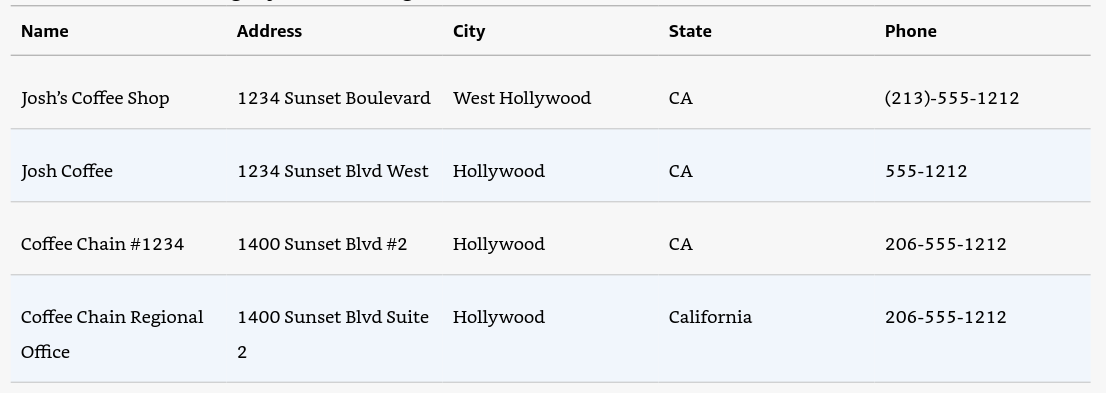

In [3]:
Image('Table_2_1.png') if IN_COLAB else display(Image(filename='Table_2_1.png'))





*The first two entries in this table refer to the same small coffee shop, even though a data entry error makes it look as if they are in two different cities (West Hollywood and Hollywood). The second two entries, on the other hand, are actually referring to different business locations of the same chain of coffee shops that happen to share a common address: one of the entries refers to an actual coffee shop, and the other one refers to a local corporate office location. Both of the entries give the official phone number of the corporate headquarters in Seattle. This example illustrates everything that makes record linkage so difficult: even though both pairs of entries look similar to each other, the criteria that we use to make the duplicate/not-duplicate decision is different for each pair. This is the kind of distinction that is easy for a human to understand and identify at a glance, but is difficult for a computer to learn. Record linkage goes by a lot of different names in the literature and in practice: entity resolution, record deduplication, merge-and-purge, and list washing. For our purposes, we refer to this problem as record linkage.*

Scaricamento dei dati da terminale anaconda (dalla directory corrente, nella sotto-directory *linkage*, da creare):<br>
- mkdir linkage<br>
- cd linkage/<br>
- curl -L -o donation.zip https://bit.ly/1Aoywaq<br>
- unzip donation.zip<br>
- unzip 'block_*.zip'<br>

In [4]:
%pwd    # la directory corrente (un magic command)

'c:\\Users\\Utente\\Desktop\\salvataggi\\SALVATAGGIO DATI\\Documents\\Seminari\\Data Science (corsi)\\Corso Big Data con Spark'

Se la procedura da terminale prima descritta NON funziona, fare click sul link ed unzippare i file zip uno per volta (estranedoli nella sotto-directory *linkage*):

In [5]:
spark = SparkSession.builder \
.appName("MyApp") \
.master("local[6]") \
.config("spark-driver.memory", "8g") \
.getOrCreate()

NameError: name 'SparkSession' is not defined

In [74]:
import os
print(os.getcwd())
# /content in Google Colab


/content


In [83]:
import pandas as pd

# questo è un dataframe PANDAS (python) - non è spark
df = pd.read_csv('sample_data/linkage/block_1.csv')
display(df.head(10))
display(type(df))

# questo è un dataframe spark
# lettura in spark dei 10 file CSV
# --> per la lettura di molti file vedi il post stackoverflow 69350586;
#     * (Tandon-Ryza-Laserson-Owen-Wills) non funziona;
#     con la directory 'linkage/file/csv' non funziona;

prev = spark.read.csv([
    "sample_data/linkage/block_1.csv","sample_data/linkage/block_2.csv",
    "sample_data/linkage/block_3.csv","sample_data/linkage/block_4.csv",
    "sample_data/linkage/block_5.csv","sample_data/linkage/block_6.csv",
    "sample_data/linkage/block_7.csv","sample_data/linkage/block_8.csv",
    "sample_data/linkage/block_9.csv","sample_data/linkage/block_10.csv"

])


,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,37291,53113,0.833333333333333,?,1.0,?,1,1,1,1,0,True
1,39086,47614,1,?,1.0,?,1,1,1,1,1,True
2,70031,70237,1,?,1.0,?,1,1,1,1,1,True
3,84795,97439,1,?,1.0,?,1,1,1,1,1,True
4,36950,42116,1,?,1.0,1,1,1,1,1,1,True
5,42413,48491,1,?,1.0,?,1,1,1,1,1,True
6,25965,64753,1,?,1.0,?,1,1,1,1,1,True
7,49451,90407,1,?,1.0,?,1,1,1,1,0,True
8,39932,40902,1,?,1.0,?,1,1,1,1,1,True
9,46626,47940,1,?,1.0,?,1,1,1,1,1,True


pandas.core.frame.DataFrame

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string]

In [84]:
type(prev)

pyspark.sql.dataframe.DataFrame

In [85]:
prev.count()

5749142

---

`df.shape` alla pandas non esiste in spark.<br>
Se vogliamo sapere quante righe e quante colonne (lo “shape”):
- **Righe**: `df.count()` ⟵ action, può costare tempo
- **Colonne**: `len(df.columns)`

Esempio “alla pandas”:
```python
    n_rows = df.count()              # attenzione: esegue un job
    n_cols = len(df.columns)
    shape  = (n_rows, n_cols)
```

Suggerimento: se useremo più volte il dataframe, si può:
```python
    df.cache()
    df.count()   # materializza in cache
```

Le action successive saranno più rapide.

In [89]:
len(prev.columns)

12

In [91]:
prev.show(10)  # l'equivalente del comando 'head(n)', è un metodo dell'oggetto.
               # l'output del comando è sensibile allo zoom! (si riformatta!)

+-----+-----+-----------------+------------+------------+------------+-------+------+------+------+-------+--------+
|  _c0|  _c1|              _c2|         _c3|         _c4|         _c5|    _c6|   _c7|   _c8|   _c9|   _c10|    _c11|
+-----+-----+-----------------+------------+------------+------------+-------+------+------+------+-------+--------+
| id_1| id_2|     cmp_fname_c1|cmp_fname_c2|cmp_lname_c1|cmp_lname_c2|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
|37291|53113|0.833333333333333|           ?|           1|           ?|      1|     1|     1|     1|      0|    TRUE|
|39086|47614|                1|           ?|           1|           ?|      1|     1|     1|     1|      1|    TRUE|
|70031|70237|                1|           ?|           1|           ?|      1|     1|     1|     1|      1|    TRUE|
|84795|97439|                1|           ?|           1|           ?|      1|     1|     1|     1|      1|    TRUE|
|36950|42116|                1|           ?|           1|       

Quale è la **dimensione** del dataframe? (cioè l'equivalente di `df.size` in pandas)

spark mantiene una stima (`sizeInBytes`) nel piano ottimizzato

In [92]:
est = prev._jdf.queryExecution().optimizedPlan().stats().sizeInBytes()
print(est)  # può essere una stima grossolana


262522417


Memoria usata in cache:<br>
Dopo `df.persist()` oppure `df.cache()` si guarda la Spark UI → Storage per i MB/partizione. È il modo più chiaro per **l’uso reale in RAM degli executor**.

---

Bene, come ci aspettavamo, il file CSV è stato correttamente suddiviso nelle sue singole colonne. Per default, ogni colonna di un file CSV è trattata come tipo *stringa*, ed i nomi di default delle varie colonne sono *_c0*, *_c1*, *_c2*, ecc. La prima riga è costituita dagli header di colonna del file csv. Le stringhe contenenti "?" indicano la presenza di valori mancanti (*missing values*).

In [93]:
prev.printSchema() # la visualizzazione della struttura (schema, cioè metadati) dell'oggetto creato
                   # (l'equivalente di 'str(dataframe)' in R)
                   # nullable = missing values ammessi

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



E' possibile dire a Spark di **inferire** i nomi delle colonne dagli header del file csv, di sostituire i "?" con *null*, e di inferire il data type della colonna dal file csv, in questo modo (tramite le opzioni della API `DataFrameReader`):

In [98]:
parsed = spark.read.option("header", "true").option("nullValue", "?").\
          option("inferSchema", "true").csv([
    "sample_data/linkage/block_1.csv","sample_data/linkage/block_2.csv",
    "sample_data/linkage/block_3.csv","sample_data/linkage/block_4.csv",
    "sample_data/linkage/block_5.csv","sample_data/linkage/block_6.csv",
    "sample_data/linkage/block_7.csv","sample_data/linkage/block_8.csv",
    "sample_data/linkage/block_9.csv","sample_data/linkage/block_10.csv"
])

In [99]:
parsed.count()

5749132

NB. Si parla di "parsificazione" perchè Spark deve inferire le informazioni dall'esame di tutto il dataset, estraendo le stringhe da valutare.

In [101]:
parsed.show(10)

+-----+-----+-----------------+------------+------------+------------+-------+------+------+------+-------+--------+
| id_1| id_2|     cmp_fname_c1|cmp_fname_c2|cmp_lname_c1|cmp_lname_c2|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
+-----+-----+-----------------+------------+------------+------------+-------+------+------+------+-------+--------+
|37291|53113|0.833333333333333|        NULL|         1.0|        NULL|      1|     1|     1|     1|      0|    true|
|39086|47614|              1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|70031|70237|              1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|84795|97439|              1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|36950|42116|              1.0|        NULL|         1.0|         1.0|      1|     1|     1|     1|      1|    true|
|42413|48491|              1.0|        NULL|         1.0|       

   **Significato colonne**:<br>
   1. id_1: Internal identifier of first record.
   2. id_2: Internal identifier of second record.
   3. cmp_fname_c1: agreement of first name, first component
   4. cmp_fname_c2: agreement of first name, second component
   5. cmp_lname_c1: agreement of family name, first component
   6. cmp_lname_c2: agreement of family name, second component
   7. cmp_sex: agreement sex
   8. cmp_bd: agreement of date of birth, day component
   9. cmp_bm: agreement of date of birth, month component
   10. cmp_by: agreement of date of birth, year component
   11. cmp_plz: agreement of postal code
   12. is_match: matching status (TRUE for matches, FALSE for non-matches)

Per vedere il data type inferito per ogni colonna, possiamo visualizzare lo schema del DataFrame *parsed* in questo modo:

In [102]:
parsed.printSchema()

root
 |-- id_1: integer (nullable = true)
 |-- id_2: integer (nullable = true)
 |-- cmp_fname_c1: double (nullable = true)
 |-- cmp_fname_c2: double (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_lname_c2: double (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: integer (nullable = true)
 |-- cmp_bm: integer (nullable = true)
 |-- cmp_by: integer (nullable = true)
 |-- cmp_plz: integer (nullable = true)
 |-- is_match: boolean (nullable = true)



Per ogni colonna è riportato il nome della colonna stessa, il data type più appropriato (inferito appunto in base ai dati rilevati nel file CSV per quella colonna), ed un booleano per la presenza/assenza di null-value in quella colonna (default = True).<br>
L'inferenza è fatta in due passi da Spark:
* capire/ipotizzare il data-type di ogni colonna (prima scansione del dataset), fattibile anche solo su un campione, se richiesto dall'utente
* il parsing effettivo (seconda scansione del dataset)

Se **si conosce in anticipo lo schema dei dati in input (la loro struttura)**, si può ottenere un significativo beneficio prestazionale in questo modo:

In [104]:
from pyspark.sql.types import *

# definizione dello schema del dataframe spark
schema = StructType([
    StructField("id_1", IntegerType(), False),
    StructField("id_2", StringType(), False),
    StructField("cmp_fname_c1", DoubleType(), False),
    StructField("cmp_fname_c2", DoubleType(), False),
    StructField("cmp_lname_c1", DoubleType(), False),
    StructField("cmp_lname_c2", DoubleType(), False),
    StructField("cmp_sex", IntegerType(), False),
    StructField("cmp_bd", IntegerType(), False),
    StructField("cmp_bm", IntegerType(), False),
    StructField("cmp_by", IntegerType(), False),
    StructField("cmp_plz", IntegerType(), False),
    StructField("is_match", BooleanType(), False)
                        ])
prev2 = spark.read.schema(schema).csv("sample_data/linkage/block_1.csv")
print(prev2)
prev2.show(5)

DataFrame[id_1: int, id_2: string, cmp_fname_c1: double, cmp_fname_c2: double, cmp_lname_c1: double, cmp_lname_c2: double, cmp_sex: int, cmp_bd: int, cmp_bm: int, cmp_by: int, cmp_plz: int, is_match: boolean]
+-----+-----+-----------------+------------+------------+------------+-------+------+------+------+-------+--------+
| id_1| id_2|     cmp_fname_c1|cmp_fname_c2|cmp_lname_c1|cmp_lname_c2|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
+-----+-----+-----------------+------------+------------+------------+-------+------+------+------+-------+--------+
| NULL| id_2|             NULL|        NULL|        NULL|        NULL|   NULL|  NULL|  NULL|  NULL|   NULL|    NULL|
|37291|53113|0.833333333333333|        NULL|         1.0|        NULL|      1|     1|     1|     1|      0|    true|
|39086|47614|              1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|70031|70237|              1.0|        NULL|         1.0|        NULL|      1|     1|    

Ed ora un altro esempio di creazione di un DataFrame di **impiegati** (che qui per semplicità chiamiamo `df`) fornendo i dati nel metodo (`data`):

In [105]:
data =[("James ","","Smith","36636","M",3000),
              ("Michael ","Rose","","40288","M",4000),
              ("Robert ","","Williams","42114","M",4000),
              ("Maria ","Anne","Jones","39192","F",4000),
              ("Jen","Mary","Brown","","F",-1)]
columns=["firstname","middlename","lastname","dob","gender","salary"]
df=spark.createDataFrame(data,columns)
print(type(df))
df.show(5)

<class 'pyspark.sql.dataframe.DataFrame'>
+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|  dob|gender|salary|
+---------+----------+--------+-----+------+------+
|   James |          |   Smith|36636|     M|  3000|
| Michael |      Rose|        |40288|     M|  4000|
|  Robert |          |Williams|42114|     M|  4000|
|   Maria |      Anne|   Jones|39192|     F|  4000|
|      Jen|      Mary|   Brown|     |     F|    -1|
+---------+----------+--------+-----+------+------+



L'elenco di tutte le opzioni della API `DataFrameReader` disponibili è consultabile nella [documentazione di PySpark](https://spark.apache.org/docs/2.0.2/api/java/org/apache/spark/sql/DataFrameReader.html), **nella sezione *CSV***.

## Formati dei dati e sorgenti dei dati

Spark è fornito con il supporto integrato per la <u>lettura e la scrittura di dataframe</u> in una **varietà di formati** tramite le API *DataFrameReader* e *DataFrameWriter*. **Oltre al formato CSV** qui discusso, si può anche leggere e scrivere dati strutturati dalle seguenti fonti:
* *parquet*: un formato di archiviazione dei dati orientato alle colonne (opzione predefinita in Spark), molto utilizzato
* *orc*: un altro formato di archiviazione dei dati orientato alle colonne
* *json*: supporta molti delle stesse funzionalità di inferenza dello schema fornita dal formato CSV
* *jdbc*: si connette a un database relazionale tramite lo standard di connessione dati JDBC
* *avro*: fornisce un'efficiente serializzazione e deserializzazione dei messaggi quando si utilizza un'origine di streaming come Apache Kafka
* *text*: associa ogni riga di un file a un dataframe con una singola colonna di tipo *string*
* *image*: carica i file immagine da una directory come un dataframe con una colonna, contenente i dati dell'immagine memorizzati come schema immagine
* *libsvm*: un popolare formato di file di testo, usato per rappresentare osservazioni etichettate con caratteristiche sparse
* *binary*: legge i file binari e converte ogni file in una singola riga di dataframe (novità di Spark 3.0)
* *xml*: un semplice formato basato su testo per rappresentare informazioni strutturate come documenti, dati, configurazione o libri (disponibili tramite il pacchetto `spark-xml`)

# Analisi dei dati con la *dataframe API* di PySpark

Utilizziamo il dataframe dei pazienti di prima (`parsed`):

In [ ]:
parsed.printSchema()
parsed.show(5)

root
 |-- id_1: integer (nullable = true)
 |-- id_2: integer (nullable = true)
 |-- cmp_fname_c1: double (nullable = true)
 |-- cmp_fname_c2: double (nullable = true)
 |-- cmp_lname_c1: double (nullable = true)
 |-- cmp_lname_c2: double (nullable = true)
 |-- cmp_sex: integer (nullable = true)
 |-- cmp_bd: integer (nullable = true)
 |-- cmp_bm: integer (nullable = true)
 |-- cmp_by: integer (nullable = true)
 |-- cmp_plz: integer (nullable = true)
 |-- is_match: boolean (nullable = true)

+-----+-----+------------+------------+------------+------------+-------+------+------+------+-------+--------+
| id_1| id_2|cmp_fname_c1|cmp_fname_c2|cmp_lname_c1|cmp_lname_c2|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
+-----+-----+------------+------------+------------+------------+-------+------+------+------+-------+--------+
| 3148| 8326|         1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|14055|94934|         1.0|        NULL|         1.0|      

**Il significato delle colonne**:<br>
* Le prime due colonne sono ID interi che rappresentano i pazienti che sono stati confrontati nel record. Ogni record infatti rappresenta un **confronto**, da qui il prefisso *cmp* (comparison).
* Le successive nove colonne contengono i **match score** (magari mancanti), di tipo intero o double, tra i due pazienti, per ognuna delle colonne (nome, data di nascita, residenza, ecc). I match score sono interi quando i possibili risultati del match sono solo 0 (no-match) ed 1 (match), sono double quando sono possibili match parziali.
* L'ultima colonna è un booleano (vero o falso) che indica se i due pazienti confrontati sono gli stessi. Nel gergo del Machine Learning, questa colonna è detta **risposta** (o target).<br>

Lo scopo è di costruire un **semplice classificatore** che ci permetta di <u>prevedere</u> se un nuovo record sia un match oppure no, in base ai valori dei vari match score.

La API DataFrame ha molti metodi - definiti sempre con () finali - che permettono di lavorare con i dataframe. Iniziamo con 2 metodi già visti:

In [ ]:
parsed.first() # uno dei metodi più semplici: restituisce la prima riga del dataframe

Row(id_1=3148, id_2=8326, cmp_fname_c1=1.0, cmp_fname_c2=None, cmp_lname_c1=1.0, cmp_lname_c2=None, cmp_sex=1, cmp_bd=1, cmp_bm=1, cmp_by=1, cmp_plz=1, is_match=True)

In [ ]:
parsed.first # senza parentesi, dà la signature del metodo!

<bound method DataFrame.first of DataFrame[id_1: int, id_2: int, cmp_fname_c1: double, cmp_fname_c2: double, cmp_lname_c1: double, cmp_lname_c2: double, cmp_sex: int, cmp_bd: int, cmp_bm: int, cmp_by: int, cmp_plz: int, is_match: boolean]>

In [ ]:
parsed.count()

5749132

In [ ]:
parsed.select("cmp_fname_c1", "cmp_fname_c2").show(10) # il metodo 'select' estrae il subset di colonne

+------------+------------+
|cmp_fname_c1|cmp_fname_c2|
+------------+------------+
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
|         1.0|        NULL|
+------------+------------+
only showing top 10 rows


Se il dataframe NON è troppo grande, può essere <u>convertito in pandas</u> con il metodo `toPandas()` e <u>convertito in una array</u> di oggetti *Row* con il metodo `collect()`. Entrambi i metodi restituiscono i dati **alla app client**. Per dataframe estremamente grandi l'utilizzo di questi due metodi può essere pericoloso e causare eccezioni *out-of-memory* (verificato!).<br>
[Tuttavia, il caricamento dei 10 file CSV di linkage in *pandas* (avendo prima liberato le risorse allocate a Spark tramite la chiusura della connessione spark) sembra funzionare correttamente: vedi notebook *Caricamento di big data in pandas* in questa directory.]

In [ ]:
pd = parsed.toPandas()  # per dataframe NON troppo grandi (ad esempio un solo file csv, altrimenti dà messaggio
                        # di errore "out-of-memory"

Py4JJavaError: An error occurred while calling o448.collectToPython.
: java.lang.OutOfMemoryError: Java heap space


Infatti! `OutOfMemory`! Dataset troppo grande per il driver (RAM).<br>
`toPandas()` porta tutto sul driver. Con 10 CSV può saturare la memoria.<br>
Fix sicuro:

In [ ]:
pdf = parsed.limit(50_000).toPandas()          # subset
# oppure
pdf = parsed.sample(fraction=0.1, seed=42).toPandas()


Vediamo ora il metodo `collect`.<br>
La seguente cella dà l'errore `OutOfMemory`:

In [ ]:
parsed.collect() # per dataframe NON troppo grandi

Py4JJavaError: An error occurred while calling o448.collectToPython.
: java.lang.OutOfMemoryError: Java heap space


`df.collect()` è un’**action** che:

* **Esegue** tutto il piano del DataFrame.
* **Trasferisce tutte le righe al driver** (il processo Python locale).
* **Restituisce** una **lista di `Row`** Python (es.: `[Row(...), Row(...), ...]`).

**Implicazioni pratiche**

* **Rischio memoria**: porta *tutti* i dati sul driver → su dataset grandi può andare in OOM o rallentare molto.
* **Ordine**: nessuna garanzia d’ordine se non è stato fatto un `orderBy(...)`.
* **Costo**: computazione + serializzazione + rete (anche in `local[*]`).

Quando (non) usarla**

* ✔️ OK solo per risultati **piccoli** (campioni, aggregati compatti).
* ❌ Evitarla su tabelle grandi; preferire:

  * `df.limit(n).collect()` o `df.take(n)` per poche righe.
  * `df.show(n)` per ispezione veloce.
  * `df.toPandas()` (solo se il risultato entra nella RAM del driver; meglio con Arrow).
  * `df.toLocalIterator()` per **streaming** al driver senza caricare tutto in una lista (meno memoria, più lento).
  * Scrivere su storage: `df.write.parquet(...)` anziché riportare i dati al driver.

**Mini-esempi**

```python
    rows = df.collect()             # -> List[Row]
    first5 = df.take(5)             # più sicuro se basta un campione
    for row in df.toLocalIterator():  # iterazione “a flusso”, meno picchi di RAM
        process(row)
```

> Nota: da **non confondere** con le funzioni SQL `collect_list` / `collect_set` (aggregazioni che producono array per gruppo), che sono un’altra cosa rispetto a `DataFrame.collect()`.
---

Finora, per ogni elaborazione dei dati, Spark ha riaperto il file, ri-parsificato le righe e poi eseguito l'azione richiesta, come ad esempio mostrare le prime righe o contare le righe. E' meglio salvare sul cluster il DataFrame parsificato, subito dopo la prima parsificazione, per non doverla ripetere all'infinito ad ogni azione richiesta, <u>tramite il metodo `cache()`</u>.

In [ ]:
parsed.cache()   # il DataFrame è messo in cache


DataFrame[id_1: int, id_2: int, cmp_fname_c1: double, cmp_fname_c2: double, cmp_lname_c1: double, cmp_lname_c2: double, cmp_sex: int, cmp_bd: int, cmp_bm: int, cmp_by: int, cmp_plz: int, is_match: boolean]

---

**Trasformazioni vs azioni**<br>
In Spark occorre distinguere tra *trasformazione* ed *azione*.<br>
La creazione di un DataFrame non provoca alcun calcolo distribuito nel cluster. Piuttosto, i DataFrame definiscono dataset <u>logici</u> che sono **passaggi intermedi di un calcolo**. Le operazioni Spark sui dati distribuiti possono essere classificate in **due tipi**: trasformazioni e azioni.<br>
Tutte le trasformazioni sono valutate in modo "pigro" (*lazy*); cioè, i loro risultati non sono calcolati immediatamente, ma vengono registrati (*data lineage* = ciclo di vita / storia del dato). Ciò permette a Spark di ottimizzare il piano di query al momento dell'esecuzione dell'azione. Il calcolo distribuito, infatti, è eseguito solo allla richiesta di un'azione sul DataFrame. Ad esempio, l'azione *count()* restituisce il numero di oggetti in un DataFrame, come visto prima. La azione *collect()* restituisce un'array (formata da oggetti di tipo *Row*, come detto) che **risiede nella memoria locale, non nel cluster**.<br>
Lo scopo delle azioni non è solo quello di retituire i dati al processo locale. L'azione `save()` salva i contenuti del DataFrame in modo persistente, cioè su disco.

---

**Salvataggio su disco del DataFrame**

Varie possibilità:

```python
  # 1) Scorciatoia specifica Parquet
  parsed.write.parquet("proto.parquet")

  # 2) Con overwrite (se la cartella esiste già)
  parsed.write.mode("overwrite").parquet("proto.parquet")

  # 3) Via API generica .format(...).save(...)
  parsed.write.format("parquet").save("proto.parquet")
  # oppure
  parsed.write.format("parquet").mode("overwrite").save("proto.parquet")
```

Note utili:

* Spark scrive **una directory** chiamata `proto.parquet` con dentro uno o più file `part-*.parquet` + `_SUCCESS`.
  Se vuole un **solo file** (comodo per demo), può:

  ```python
    parsed.coalesce(1).write.mode("overwrite").parquet("proto.parquet")
  ```
* Per rileggerlo:

  ```python
    df2 = spark.read.parquet("proto.parquet")
  ```
* Percorsi Windows: usare stringhe raw o lo schema file:

  ```python
    parsed.write.parquet(r"C:\percorso\proto.parquet")
    # oppure
    parsed.write.parquet("file:///C:/percorso/proto.parquet")
  ```

  Ottima osservazione: è importante capire bene questo comportamento perché **è diverso** da quello a cui si è abituati con file “normali” (come in pandas o Python puro).

---

🧩 In Spark, *“scrivere un file”* significa **scrivere una directory**

Quando si fa :

```python
  parsed.write.parquet("proto.parquet")
```

Spark **non crea un singolo file** `proto.parquet`,
bensì una **cartella** (directory) chiamata `proto.parquet/` che contiene:

```
proto.parquet/
 ├── part-00000-...snappy.parquet
 ├── part-00001-...snappy.parquet
 ├── _SUCCESS
 └── ...
```

perché:

* ogni *partizione* del DataFrame Spark scrive il suo **pezzo** (`part-xxxxx`),
* Spark è progettato per il calcolo distribuito → più nodi = più file.

---

💡 Se si lavora in locale e si vuole un solo file

Si possono **unire le partizioni** prima della scrittura:

```python
  parsed.coalesce(1).write.mode("overwrite").parquet("proto.parquet")
```

Così si avrà un’unica directory con **un solo file `part-00000...parquet`** al suo interno.

Se poi ci serve proprio un **singolo file .parquet fisico** (per esempio per aprirlo da Windows Explorer o pandas):

```python
  import shutil
  import glob

  # Spark crea la directory proto.parquet/
  file = glob.glob("proto.parquet/part-*.parquet")[0]
  shutil.copy(file, "proto_unico.parquet")   # copia fuori il singolo file
```

📂 **In sintesi**:

* “**Cartella**” = directory che contiene i veri file parquet.
* Spark usa questo schema sempre, anche per CSV, JSON, ecc.
* È perfettamente normale e previsto dal design “distribuito”.

---

Dopo questa breve rassegna di metodi, calcoliamo le **frequenze di classe**:

In [ ]:
from pyspark.sql.functions import col
parsed.groupBy("is_match").count().orderBy(col("count").desc()).show() # si noti l'applicazione a cascata dei metodi

+--------+-------+
|is_match|  count|
+--------+-------+
|   false|5728201|
|    true|  20931|
+--------+-------+



L'applicazione a cascata dei metodi, utilizzata dal precedente comando, è un esempio del **modo pulito, veloce ed espressivo di fare analisi dei dati in Spark**.

Vediamo ora alcune **funzioni statistiche**:

In [ ]:
from pyspark.sql.functions import avg, min, stddev                    # oppure max, stddev_pop, ecc
parsed.agg(avg("cmp_sex"), min("cmp_sex"),stddev("cmp_sex")).show()   # 'agg' sta per 'aggregate'

+-----------------+------------+-------------------+
|     avg(cmp_sex)|min(cmp_sex)|    stddev(cmp_sex)|
+-----------------+------------+-------------------+
|0.955001381078048|           0|0.20730111116897781|
+-----------------+------------+-------------------+



I nomi di queste funzioni ed anche di altre funzioni della API DataFrame (ad esempio, count, group_by, order_by, ecc) sono volutamente **simili a quelli dell'SQL**. Infatti, abbiamo la possibilità di trattare qualsiasi DataFrame <u>come se fosse una tabella relazionale</u> ed accedervi direttamente <u>tramite il linguaggio SQL</u> (ANSI 2003-compliant).<br>
A questo scopo la prima cosa da fare è dire al motore SQL di Spark il nome da associare al DataFrame `parsed`, che infatti non è disponibile oltre la vita della sessione. L'oggetto *parsed* cioè è **temporaneo**.

In [ ]:
parsed.createOrReplaceTempView("linkage")

Ora che la tabella temporanea *parsed* è registrata nel motore SQL di Spark come *linkage*, possiamo farci sopra delle query:

In [ ]:
spark.sql("""
  SELECT is_match, COUNT(*) cnt
  FROM linkage
  GROUP BY is_match
  ORDER BY cnt DESC
""").show()

+--------+-------+
|is_match|    cnt|
+--------+-------+
|   false|5728201|
|    true|  20931|
+--------+-------+



**E' meglio accedere al dataset con le API DataFrame o con SQL?** Ci sono pro e contro:<br>
* SQL è semplice, potente e conosciuto; permette inoltre di usare le tradizionali connessioni [JDBC](https://it.wikipedia.org/wiki/Java_DataBase_Connectivity) / [ODBC](https://it.wikipedia.org/wiki/Open_Database_Connectivity) per accedere a database come Oracle, PostgreSQL od a tool come Tableau;
* per contro, le API DataFrame sono certamente superiori all'SQL per esprimere complesse analisi multi-step in modo dinamico.

[SQL vs PySpark](https://www.linkedin.com/feed/update/urn:li:activity:7120427171269001219?utm_source=share&utm_medium=member_desktop)

# API DataFrame vs API RDD (in Spark 4)

La differenza non è tanto “Spark 4” in sé (il modello è lo stesso da Spark 2.x), quanto il **livello di astrazione**:

* **RDD** = API storica, a basso livello, collezione distribuita di oggetti.
* **DataFrame** = API moderna e principale, tabellare (righe/colonne, con schema), pesantemente ottimizzata e integrata con SQL.

In Spark 4 l’evoluzione delle feature va quasi tutta in direzione **DataFrame/SQL**, mentre l’API RDD rimane di supporto e per casi speciali. ([Apache Spark][1])

---
1️⃣ **Modello concettuale**

**RDD (Resilient Distributed Dataset)**

* "Collezione" distribuita di elementi generici (object, Row, string, ecc.). ([Baeldung on Kotlin][2])
* Non ha uno schema tabellare di default.
* Si lavora con funzioni tipo `map`, `flatMap`, `filter`, `reduceByKey`, ecc. → stile “functional”, molto libero.

**DataFrame**

* Collezione distribuita **con colonne nominate** e **schema** (tipo tabella SQL). ([Databricks][3])
* È in realtà un `Dataset[Row]` (in Scala) e in PySpark è implementato sopra gli RDD. ([Apache Spark][4])
* Si ragiona in termini di colonne e operatori SQL-like: `select`, `where`, `groupBy`, `join`, funzioni di aggregazione, ecc.

---

2️⃣ **Ottimizzazione ed esecuzione**

**RDD**

* Le trasformazioni su RDD vengono eseguite con un piano relativamente “diretto”; Spark può fare alcune ottimizzazioni, ma **non ha informazione sullo schema** né sulle espressioni SQL.
* Non entra in gioco il **Catalyst optimizer** in modo profondo.

**DataFrame**

* Ogni query DataFrame viene tradotta in un **piano logico** e poi ottimizzata da **Catalyst** (riordino di join, pushdown di filtri, rimozione di colonne inutili, ecc.), poi in un **piano fisico** con **whole-stage codegen**. ([Databricks][3])
* Risultato pratico: per la maggior parte dei workload di tipo analytics / ETL, i DataFrame sono **molto più veloci e scalabili** rispetto all’equivalente logica scritta a mano con RDD.

In Spark 4 le nuove feature “serie” sono tutte agganciate al mondo SQL/DataFrame, ad esempio:

* tipo **VARIANT** per JSON e semi-strutturato, integrato con SQL e DataFrame; ([Decube][5])
* nuove **Data Source API (DSV2, Python Data Source)** per scrivere sorgenti/target personalizzati, sempre viste come DataFrame; ([Medium][6])
* plotting nativo `.plot()` sulle DataFrame PySpark. ([Databricks][7])

Nulla di paragonabile è stato aggiunto sul lato RDD.

---

3️⃣ **Schema, tipi e integrazione**

**RDD**

* Può contenere qualsiasi tipo di oggetto (anche strutture annidate arbitrarie).
* Nessun concetto di schema a livello di motore SQL → niente metadati su tipi e colonne.
* Per usare SQL su un RDD serve **promuoverlo a DataFrame** (es. `spark.createDataFrame(rdd, schema)`).

**DataFrame**

* Ha sempre uno **schema** (colonne + tipi), che può essere inferito (es. da CSV/JSON) o definito manualmente. ([algoscale][8])
* Si integra naturalmente con:

  * **Spark SQL** (`spark.sql(...)`);
  * **pandas API on Spark**;
  * **MLlib moderno** (pipeline basate su DataFrame);
  * **Structured Streaming**. ([Apache Spark][1])

---

4️⃣ **Type safety e linguaggi**

Qui è più rilevante per Scala/Java che per Python, ma per completezza:

* **RDD**: type safety a compile-time (in Scala/Java): è noto il tipo degli elementi, il compilatore controlla le funzioni applicate. ([algoscale][8])
* **DataFrame**: in Scala è `Dataset[Row]` → perde type safety forte; in Python/R comunque non c’è compile-time type checking.
* In Scala esiste anche **Dataset[T]**, che combina type safety con l’ottimizzazione Catalyst, ma in Spark 4 Python resta centrato su DataFrame. ([Databricks][3])

---

5️⃣ **Performance pratica (Spark 4 compreso)**

In generale, anche su Spark 4:

* Per operazioni **relazionali/analitiche** (join, groupBy, aggregazioni, proiezioni) i DataFrame:

  * sono **più brevi da scrivere**,
  * sfruttano automaticamente gli **optimizer**,
  * si integrano con tutte le nuove feature (VARIANT, plotting, datasource V2, ecc.). ([Medium][9])
* Gli RDD danno **più controllo** sulla struttura dei dati e sul flusso, ma si paga in verbosità e, spesso, in performance.

---

6️⃣ **Quando usare cosa (oggi, con Spark 4)**

**DataFrame API (consigliata come default)**

Meglio usare DataFrame quando:

* i dati sono **strutturati o semi-strutturati** (CSV, JSON, Parquet, tabelle SQL, Delta, ecc.); ([algoscale][8])
* si fanno classiche pipeline di **ETL**, reportistiche, BI, data science;
* si vogliono usare **Spark SQL**, **pandas API on Spark**, **MLlib** moderno, **Structured Streaming**;
* si vogliono sfruttare le novità di Spark 4 (VARIANT, `.plot()`, nuovi data source, ecc.).

In pratica, nel mondo Spark 3.x/4.x, tutto ciò che è “data engineering / analytics” sta molto meglio in DataFrame.

**RDD API (per casi speciali)**

Ha ancora senso usare RDD quando:

* si lavora con **dati non strutturati** difficilmente mappabili subito in colonne (log grezzi, testi liberi, byte array, ecc.);
* serve una logica **molto custom** o algoritmi iterativi complessi (alcuni algoritmi di grafi, di basso livello, ecc.);
* si ha bisogno di **controllo fine** su partizionamento e struttura in memoria e il modello tabellare è troppo stretto;
* si devono usare librerie legacy o componenti che **espongono ancora solo RDD** (es. **GraphX**, API MLlib storiche). ([sparkbyexamples.com][10])

Spesso, la strategia “pulita” è:

1. leggere e preparare i dati soprattutto con DataFrame/SQL;
2. se necessario, scendere a RDD solo per lo step particolarmente custom;
3. eventualmente risalire a DataFrame per il resto della pipeline.

---

**Riassunto**

* In Spark 4 **l’API consigliata è DataFrame** (più concisa, più veloce, più integrata con tutte le novità).
* L’**API RDD** rimane la base del motore e uno strumento di nicchia per **casi avanzati o molto custom**, ma non è il punto focale dell’evoluzione della piattaforma.


[1]: https://spark.apache.org/docs/latest/?utm_source=chatgpt.com "Overview - Spark 4.0.1 Documentation"
[2]: https://www.baeldung.com/java-spark-dataframe-dataset-rdd?utm_source=chatgpt.com "Apache Spark: Differences between Dataframes, Datasets ..."
[3]: https://www.databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html?utm_source=chatgpt.com "A Tale of Three Apache Spark APIs: RDDs vs DataFrames ..."
[4]: https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html?utm_source=chatgpt.com "Quickstart: DataFrame — PySpark 4.0.1 documentation"
[5]: https://www.decube.io/post/apache-spark-4-release?utm_source=chatgpt.com "Apache Spark 4 | Comparison with previous version"
[6]: https://medium.com/%40anil.jain.baba/apache-spark-4-0-new-features-with-sample-code-402ebf8d01e1?utm_source=chatgpt.com "Apache Spark 4.0: New Features with Sample Code"
[7]: https://www.databricks.com/blog/introducing-apache-spark-40?utm_source=chatgpt.com "Introducing Apache Spark 4.0"
[8]: https://algoscale.com/blog/apache-spark-rdd-vs-dataframe/?utm_source=chatgpt.com "Apache Spark RDD vs Dataframe - What Is The Difference?"
[9]: https://medium.com/%40kiranvutukuri/rdds-vs-dataframes-vs-datasets-choosing-the-right-part-11-b12d6969885d?utm_source=chatgpt.com "RDDs vs. DataFrames vs. Datasets Choosing the Right ..."
[10]: https://sparkbyexamples.com/spark/spark-rdd-vs-dataframe-vs-dataset/?utm_source=chatgpt.com "Spark RDD vs DataFrame vs Dataset"


Prendiamo un **caso semplicissimo**: calcolare lo stipendio medio per reparto a partire da una lista in memoria.

1️⃣ Dati di esempio (uguali per RDD e DataFrame)

In [6]:
from pyspark.sql import SparkSession

# creazione sessione
spark = (SparkSession.builder
         .master("local[*]")           # sfrutta tutti i core della macchina locale
         .appName("RDD_vs_DataFrame")  # utile per il monitoraggio
         .getOrCreate())

# Piccolo dataset in memoria: (reparto, stipendio) per dipendente
data = [
    ("IT",  3000),
    ("IT",  3500),
    ("HR",  2000),
    ("HR",  2200),
    ("FIN", 4000),
    ("FIN", 4200),
]


In [9]:
type(data)    # --> la lista è un importante oggetto python (non è un dataframe)

list

2️⃣ Versione con RDD

Qui si ragiona in termini di **collezioni di tuple** e **operazioni tipo `map`, `reduceByKey`**.<br>
Circa **17 secondi** la prima volta.

In [7]:
# 1) Creare l'RDD
rdd = spark.sparkContext.parallelize(data)
# RDD di tuple: ("IT", 3000), ...

# 2) (facoltativo) trasformare i valori per calcolare media: (somma, conteggio)
#    mappiamo (dept, sal) -> (dept, (sal, 1))
paired = rdd.map(lambda row: (row[0], (row[1], 1)))

# 3) Riduzione per chiave: somma stipendi e somma conteggi
reduced = paired.reduceByKey(
    lambda a, b: (a[0] + b[0], a[1] + b[1])   # (somma_sal, somma_n)
)

# 4) Calcolo della media: somma_sal / somma_n
avg_by_dept_rdd = reduced.mapValues(lambda x: x[0] / x[1])

for dept, avg_sal in avg_by_dept_rdd.collect():
    print(dept, avg_sal)


HR 2100.0
IT 3250.0
FIN 4100.0


**Osservazioni**:
- Nessuno schema, solo tuple.
- La logica per la media deve essere implementata “a mano” (somma, conteggi, divisione).
- Il codice è più verboso e l’ottimizzazione è limitata alle trasformazioni RDD.

3️⃣ Versione con DataFrame

Stessa logica, ma vista come tabella: colonne `department`, `salary`.<br>
Circa 10 secondi la prima volta.


```text
Output tipico:
+----------+----------+
|department|avg_salary|
+----------+----------+
|        IT|    3250.0|
|        HR|    2100.0|
|       FIN|    4100.0|
+----------+----------+
```


In [8]:
from pyspark.sql import functions as F                       # 'as F' è solo un alias (per brevità)

# 1) Creare il DataFrame con schema
df = spark.createDataFrame(data, ["department", "salary"])   # trasformazione della lista 'data' in un dataframe spark con gli header (i nomi colonna), che NON c'erano nella lista

# 2) Calcolare lo stipendio medio per reparto
avg_by_dept_df = (df                                         # creiamo un nuovo dataframe
    .groupBy("department")                                   # applichiamo il metodo 'groupBy' (per dipartimento) al dataframe 'df'
    .agg(F.avg("salary").alias("avg_salary"))                # per ogni gruppo calcoliamo la media del salario (tramite la funzione 'avg' di 'functions') e la chiamiamo 'avg_salary'
)

avg_by_dept_df.show()                                        # questo dataframe ha 2 colonne (department e avg_salary): la prima colonna è quella di raggruppamento, la seconda è quella calcolata
                                                             # per quel raggruppamento


+----------+----------+
|department|avg_salary|
+----------+----------+
|        IT|    3250.0|
|        HR|    2100.0|
|       FIN|    4100.0|
+----------+----------+



**Osservazioni**:
- Esiste uno schema esplicito (`department: string, salary: bigint/double`).
- L’operatore `groupBy().agg(F.avg(...))` è dichiarativo: si dice cosa calcolare, non come implementarlo.
- Spark può ottimizzare il piano con Catalyst, il motore di ottimizzazione delle query SQL/DataFrame di Spark (per riordinare operazioni, pushdown, codegen, ecc.). Vedi [qui](https://www.databricks.com/it/glossary/catalyst-optimizer).

4️⃣ **Confronto “di stile” in una riga**

Con **RDD**: si costruisce manualmente la logica per gruppi, somme, conteggi, medie usando funzioni funzionali.

Con **DataFrame**: si scrive una query quasi SQL (`groupBy`, `avg`, `alias`) e si lascia al motore il lavoro “sporco”.

Vediamo l'**equivalente pandas** (un modulo di python per gestire i dataframe pandas) del codice precedente:

In [11]:
import pandas as pd

# 1) Creare il DataFrame con schema
# 'data' è la stessa lista di tuple/list usata in Spark
df = pd.DataFrame(data, columns=["department", "salary"])

# 2) Calcolare lo stipendio medio per reparto
avg_by_dept_df = (
    df
    .groupby("department", as_index=False)        # raggruppa per dipartimento
    .agg(avg_salary=("salary", "mean"))          # per ogni gruppo calcola la media di 'salary'
)

display(avg_by_dept_df)


,department,avg_salary
0,FIN,4100.0
1,HR,2100.0
2,IT,3250.0


# Statistiche di sintesi veloci per Dataframe

Oltre che con SQL o le API DataFrame, le statistiche di base (min, max, mean, count, stddev, ecc) possono essere calcolate in modo semplice <u>anche in questo modo</u>:

In [ ]:
summary = parsed.describe()   # questo metodo ha lo stesso nome che in 'pandas'
summary                       # --> il dataframe 'summary' ha una colonna per ogni colonna di 'parsed', la colonna 'summary'
                              #     indica la statistica applicata

DataFrame[summary: string, id_1: string, id_2: string, cmp_fname_c1: string, cmp_fname_c2: string, cmp_lname_c1: string, cmp_lname_c2: string, cmp_sex: string, cmp_bd: string, cmp_bm: string, cmp_by: string, cmp_plz: string]

In [ ]:
summary.select("summary", "cmp_fname_c1", "cmp_fname_c2").show() # il metodo 'select' sceglie il subset di colonne alle
                                                                 # quali applicare le statistiche

+-------+-------------------+------------------+
|summary|       cmp_fname_c1|      cmp_fname_c2|
+-------+-------------------+------------------+
|  count|            5748125|            103698|
|   mean| 0.7129024704437266|0.9000176718903189|
| stddev|0.38875835961628014|0.2713176105782334|
|    min|                0.0|               0.0|
|    max|                1.0|               1.0|
+-------+-------------------+------------------+



Si noti la differenza nei valori di 'count' tra le due colonne scelte. Mentre quasi tutti i record hanno un valore not-null per la prima colonna, meno del 2% dei record ha un valore not-null nella seconda colonna. Per costruire un classificatore utile, dobbiamo utilizzare colonne (predittori o feature) che sono quasi sempre presenti nel DataFrame (a meno che la mancanza sia significativa per il match-nomatch).

Come le varie colonne del DataFrame *parsed* sono **correlate** con la risposta? A questo scopo possiamo calcolare le medesime statistiche di prima <u>in modo separato per i due sotto-campioni match e miss</u>, esprimendo i filtri in uno dei due modi equivalenti (SQL way oppure API DataFrame way, dove la where è un alias Spark della filter):

In [ ]:
matches = parsed.where("is_match = true")           # filtro SQL-way (oppure API DataFrame way); può includere statement validi
                                                    # per le clausole where dell'SQL
match_summary = matches.describe()

misses = parsed.filter(col("is_match") == False)    # filtro API DataFrame way (oppure SQL way); l'operatore '==' è Python
miss_summary = misses.describe()

La seguente analisi cerca di capire se la distribuzione dei vari match score cambi a seconda che il record sia un match od un miss, e non è facile da fare:

In [ ]:
matches.show()

+-----+-----+------------+------------+------------+------------+-------+------+------+------+-------+--------+
| id_1| id_2|cmp_fname_c1|cmp_fname_c2|cmp_lname_c1|cmp_lname_c2|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
+-----+-----+------------+------------+------------+------------+-------+------+------+------+-------+--------+
| 3148| 8326|         1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|14055|94934|         1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|33948|34740|         1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|  946|71870|         1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|64880|71676|         1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|    true|
|25739|45991|         1.0|        NULL|         1.0|        NULL|      1|     1|     1|     1|      1|  

In [ ]:
matches.count()

20931

In [ ]:
match_summary.show()  # poco leggibile!

+-------+-----------------+-----------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+
|summary|             id_1|             id_2|       cmp_fname_c1|       cmp_fname_c2|        cmp_lname_c1|       cmp_lname_c2|            cmp_sex|             cmp_bd|              cmp_bm|             cmp_by|            cmp_plz|
+-------+-----------------+-----------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+
|  count|            20931|            20931|              20922|               1333|               20931|                475|              20931|              20925|               20925|              20925|              20902|
|   mean|34575.72117911232|51259.95939037791| 0.9973163859635038| 0.9898900320318176|  0

In [ ]:
match_summary.select("summary","cmp_fname_c1", "cmp_fname_c2").show() # il summary per solo 2 colonne (più leggibile!)

+-------+-------------------+-------------------+
|summary|       cmp_fname_c1|       cmp_fname_c2|
+-------+-------------------+-------------------+
|  count|              20922|               1333|
|   mean| 0.9973163859635038| 0.9898900320318176|
| stddev|0.03650667584833679|0.08251973727615237|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [ ]:
misses.show()

+-----+-----+-----------------+-----------------+------------------+------------+-------+------+------+------+-------+--------+
| id_1| id_2|     cmp_fname_c1|     cmp_fname_c2|      cmp_lname_c1|cmp_lname_c2|cmp_sex|cmp_bd|cmp_bm|cmp_by|cmp_plz|is_match|
+-----+-----+-----------------+-----------------+------------------+------------+-------+------+------+------+-------+--------+
|18206|58536|              1.0|             NULL|               0.0|        NULL|      1|     0|     1|     0|      0|   false|
| 6373|47769|            0.875|             NULL| 0.166666666666667|        NULL|      1|     1|     0|     0|      0|   false|
|14095|79961|              1.0|             NULL|               0.0|        NULL|      1|     0|     1|     0|      0|   false|
|16247|63203|              1.0|             NULL| 0.142857142857143|        NULL|      1|     0|     0|     1|      0|   false|
|15525|97448|              1.0|             NULL| 0.222222222222222|        NULL|      1|     0|     1| 

In [ ]:
miss_summary.select("summary","cmp_fname_c1", "cmp_fname_c2").show()

+-------+-------------------+-------------------+
|summary|       cmp_fname_c1|       cmp_fname_c2|
+-------+-------------------+-------------------+
|  count|            5727203|             102365|
|   mean| 0.7118634802175091| 0.8988473514090158|
| stddev|0.38908060096985553|0.27272090294010215|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



Per semplificare l'analisi, dobbiamo [trasporre](https://it.wikipedia.org/wiki/Matrice_trasposta) le righe / colonne dei due DataFrame 'match_summary' e 'miss_summary'. L'inversione di righe / colonne ci permette di mettere in [**join**](SQL_join.png) i due DataFrame ed analizzare le statitiche di sintesi; è un'operazione spesso detta *pivoting* o *reshaping*:

# Pivot e reshape dei dataframe

La trasposizione righe-colonne può essere fatta tramite le funzioni di PySpark, oppure, in modo qui più istruttivo, **in pandas**, previa conversione e successiva ri-conversione. Si può usare pandas senza timori date le piccole dimensioni dei DataFrame da trasporre (*summary*, creato precedentemente e che riporta le statistiche di base per TUTTO il dataframe *parsed*). Si noti che la conversione-riconversione Spark-pandas è possibile grazie al progetto *Apache Arrow* che ha implementato un data transfer efficiente tra JVM e Python.

In [ ]:
summary_p = summary.toPandas()

In [ ]:
type(summary_p)   # verifica che il nuovo oggetto 'summary_p' sia effettivamente un dataframe di pandas

pandas.core.frame.DataFrame

In [ ]:
summary_p

,summary,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
0,count,5749132,5749132,5748125,103698,5749132,2464,5749132,5748337,5748337,5748337,5736289
1,mean,33324.48559643438,66587.43558331935,0.7129024704437266,0.9000176718903189,0.3156278193080383,0.3184128315317443,0.955001381078048,0.22446526708507172,0.48885529849763504,0.2227485966810923,0.00552866147434343
2,stddev,23659.859374488064,23620.487613269695,0.38875835961628014,0.2713176105782334,0.3342336339615828,0.36856706620066537,0.20730111116897781,0.41722972238462636,0.4998758236779031,0.4160909629831756,0.07414914925420046
3,min,1,6,0.0,0.0,0.0,0.0,0,0,0,0,0
4,max,99980,100000,1.0,1.0,1.0,1.0,1,1,1,1,1


In [ ]:
summary_p.head() # classica funzione di pandas

,summary,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
0,count,5749132,5749132,5748125,103698,5749132,2464,5749132,5748337,5748337,5748337,5736289
1,mean,33324.48559643438,66587.43558331935,0.7129024704437266,0.9000176718903189,0.3156278193080383,0.3184128315317443,0.955001381078048,0.22446526708507172,0.48885529849763504,0.2227485966810923,0.00552866147434343
2,stddev,23659.859374488064,23620.487613269695,0.38875835961628014,0.2713176105782334,0.3342336339615828,0.36856706620066537,0.20730111116897781,0.41722972238462636,0.4998758236779031,0.4160909629831756,0.07414914925420046
3,min,1,6,0.0,0.0,0.0,0.0,0,0,0,0,0
4,max,99980,100000,1.0,1.0,1.0,1.0,1,1,1,1,1


In [ ]:
summary_p.shape  # classica funzione di pandas

(5, 12)

In [ ]:
summary_p = summary_p.set_index('summary').transpose().reset_index()  # trasposizione in pandas
summary_p

summary,index,count,mean,stddev,min,max
0,id_1,5749132,33324.48559643438,23659.859374488064,1,99980
1,id_2,5749132,66587.43558331935,23620.487613269695,6,100000
2,cmp_fname_c1,5748125,0.7129024704437266,0.38875835961628014,0.0,1.0
3,cmp_fname_c2,103698,0.9000176718903189,0.2713176105782334,0.0,1.0
4,cmp_lname_c1,5749132,0.3156278193080383,0.3342336339615828,0.0,1.0
5,cmp_lname_c2,2464,0.3184128315317443,0.36856706620066537,0.0,1.0
6,cmp_sex,5749132,0.955001381078048,0.20730111116897781,0,1
7,cmp_bd,5748337,0.22446526708507172,0.41722972238462636,0,1
8,cmp_bm,5748337,0.48885529849763504,0.4998758236779031,0,1
9,cmp_by,5748337,0.2227485966810923,0.4160909629831756,0,1


In [ ]:
summary_p = summary_p.rename(columns={'index':'field'})
summary_p

summary,field,count,mean,stddev,min,max
0,id_1,5749132,33324.48559643438,23659.859374488064,1,99980
1,id_2,5749132,66587.43558331935,23620.487613269695,6,100000
2,cmp_fname_c1,5748125,0.7129024704437266,0.38875835961628014,0.0,1.0
3,cmp_fname_c2,103698,0.9000176718903189,0.2713176105782334,0.0,1.0
4,cmp_lname_c1,5749132,0.3156278193080383,0.3342336339615828,0.0,1.0
5,cmp_lname_c2,2464,0.3184128315317443,0.36856706620066537,0.0,1.0
6,cmp_sex,5749132,0.955001381078048,0.20730111116897781,0,1
7,cmp_bd,5748337,0.22446526708507172,0.41722972238462636,0,1
8,cmp_bm,5748337,0.48885529849763504,0.4998758236779031,0,1
9,cmp_by,5748337,0.2227485966810923,0.4160909629831756,0,1


In [ ]:
summary_p = summary_p.rename_axis(None, axis=1)
summary_p

,field,count,mean,stddev,min,max
0,id_1,5749132,33324.48559643438,23659.859374488064,1,99980
1,id_2,5749132,66587.43558331935,23620.487613269695,6,100000
2,cmp_fname_c1,5748125,0.7129024704437266,0.38875835961628014,0.0,1.0
3,cmp_fname_c2,103698,0.9000176718903189,0.2713176105782334,0.0,1.0
4,cmp_lname_c1,5749132,0.3156278193080383,0.3342336339615828,0.0,1.0
5,cmp_lname_c2,2464,0.3184128315317443,0.36856706620066537,0.0,1.0
6,cmp_sex,5749132,0.955001381078048,0.20730111116897781,0,1
7,cmp_bd,5748337,0.22446526708507172,0.41722972238462636,0,1
8,cmp_bm,5748337,0.48885529849763504,0.4998758236779031,0,1
9,cmp_by,5748337,0.2227485966810923,0.4160909629831756,0,1


In [ ]:
summary_p.shape

(11, 6)

Abbiamo trasposto con successo il dataframe 'summary_p' in pandas. Ora dobbiamo ri-convertirlo in Spark con il metodo `createDataFrame`:

In [ ]:
summaryT = spark.createDataFrame(summary_p)
summaryT

DataFrame[field: string, count: string, mean: string, stddev: string, min: string, max: string]

In [ ]:
summaryT.show() #

+------------+-------+-------------------+-------------------+---+------+
|       field|  count|               mean|             stddev|min|   max|
+------------+-------+-------------------+-------------------+---+------+
|        id_1|5749132|  33324.48559643438| 23659.859374488064|  1| 99980|
|        id_2|5749132|  66587.43558331935| 23620.487613269695|  6|100000|
|cmp_fname_c1|5748125| 0.7129024704437266|0.38875835961628014|0.0|   1.0|
|cmp_fname_c2| 103698| 0.9000176718903189| 0.2713176105782334|0.0|   1.0|
|cmp_lname_c1|5749132| 0.3156278193080383| 0.3342336339615828|0.0|   1.0|
|cmp_lname_c2|   2464| 0.3184128315317443|0.36856706620066537|0.0|   1.0|
|     cmp_sex|5749132|  0.955001381078048|0.20730111116897781|  0|     1|
|      cmp_bd|5748337|0.22446526708507172|0.41722972238462636|  0|     1|
|      cmp_bm|5748337|0.48885529849763504| 0.4998758236779031|  0|     1|
|      cmp_by|5748337| 0.2227485966810923| 0.4160909629831756|  0|     1|
|     cmp_plz|5736289|0.00552866147434

In [ ]:
summaryT.printSchema()  # --> ogni campo è qui trattato come stringa; per fare le statistiche ci serve il formato NUMERICO

root
 |-- field: string (nullable = true)
 |-- count: string (nullable = true)
 |-- mean: string (nullable = true)
 |-- stddev: string (nullable = true)
 |-- min: string (nullable = true)
 |-- max: string (nullable = true)



In [ ]:
# conversione delle stringhe in double (tranne che per la colonna 'field'):
from pyspark.sql.types import DoubleType
for c in summaryT.columns:
    if c == 'field':
        continue
    summaryT = summaryT.withColumn(c, summaryT[c].cast(DoubleType()))
...
summaryT.printSchema()

root
 |-- field: string (nullable = true)
 |-- count: double (nullable = true)
 |-- mean: double (nullable = true)
 |-- stddev: double (nullable = true)
 |-- min: double (nullable = true)
 |-- max: double (nullable = true)



Definiamo infine una **funzione** che implementi tutta la logica ora vista, e che possa poi essere applicata ai DataFrame 'match_summary' e 'miss_summary':

In [ ]:
from pyspark.sql import DataFrame
from pyspark.sql.types import DoubleType

def pivot_summary(desc):
    # conversione ad un dataframe pandas
    desc_p = desc.toPandas()
    # trasposizione in pandas
    desc_p = desc_p.set_index('summary').transpose().reset_index()
    desc_p = desc_p.rename(columns={'index':'field'})
    desc_p = desc_p.rename_axis(None, axis=1)
    # conversione ad un dataframe Spark
    descT = spark.createDataFrame(desc_p)
    # conversione delle metriche da stringa a double
    for c in descT.columns:
        if c == 'field':
            continue
        else:
            descT = descT.withColumn(c, descT[c].cast(DoubleType()))
        return descT

In [ ]:
# applicazione della funzione ai due DataFrame:
match_summaryT = pivot_summary(match_summary)
match_summaryT

DataFrame[field: string, count: double, mean: string, stddev: string, min: string, max: string]

In [ ]:
miss_summaryT = pivot_summary(miss_summary)
miss_summaryT

DataFrame[field: string, count: double, mean: string, stddev: string, min: string, max: string]

Ora che abbiamo trasposto con successo i due DataFrame possiamo fare il join e confrontarli.

# Join dei dataframe e selezione delle feature

Finora abbiamo utilizzato Spark SQL e l'API DataFrame solo per filtrare e aggregare i record del dataset; li possiamo anche usare per eseguire **join** (inner, left outer, right outer o full outer) su DataFrame. L'API DataFrame include una funzione di join; tuttavia spesso è più semplice esprimere questi join utilizzando Spark SQL, soprattutto quando le tabelle che stiamo unendo hanno un numero elevato di colonne in comune e quindi, per chiarezza, vogliamo poter indicare chiaramente a quale colonna ci riferiamo nelle nostre `select`.<br>

Creiamo delle viste temporanee per i dataframe `match_summaryT` e `miss_summaryT`, mettiamole in join sulla colonna `field` e calcoliamo alcune semplici statistiche di riepilogo sulle righe risultanti:

In [ ]:
match_summaryT.createOrReplaceTempView("match_desc")               # vista SQL temporanea dei match
miss_summaryT.createOrReplaceTempView("miss_desc")                 # vista SQL dei miss

In [ ]:
from pyspark.sql import functions as F

# 1) Seleziono e rinomino le colonne "sensibili" PRIMA del join
a = (match_summaryT
     .select(
         "field",
         F.col("count").cast("double").alias("a_count"),
         F.col("mean").cast("double").alias("a_mean"))
    )

b = (miss_summaryT
     .select(
         "field",
         F.col("count").cast("double").alias("b_count"),
         F.col("mean").cast("double").alias("b_mean"))
    )

# 2) Join + filtro + calcoli
out = (a.join(b, on="field", how="inner")
         .where(~F.col("field").isin("id_1", "id_2"))
         .select(
             "field",
             (F.col("a_count") + F.col("b_count")).alias("total"),
             (F.col("a_mean")  - F.col("b_mean")).alias("delta"),
         )
         .orderBy(F.desc("delta"), F.desc("total"))
      )

out.show(truncate=False)


+------------+---------+--------------------+
|field       |total    |delta               |
+------------+---------+--------------------+
|cmp_plz     |5736289.0|0.9563812499852176  |
|cmp_lname_c2|2464.0   |0.8064147192926266  |
|cmp_by      |5748337.0|0.7762059675300512  |
|cmp_bd      |5748337.0|0.775442311783404   |
|cmp_lname_c1|5749132.0|0.6838772482594513  |
|cmp_bm      |5748337.0|0.5109496938298685  |
|cmp_fname_c1|5748125.0|0.2854529057459947  |
|cmp_fname_c2|103698.0 |0.09104268062280174 |
|cmp_sex     |5749132.0|0.032408185250332844|
+------------+---------+--------------------+



La colonna *Total* conta il numero di valori not null. La colonna *delta* calcola la differenza tra le due medie delle due popolazioni (match e miss).

Un buon predittore ha due proprietà (applicate al datasaet in oggetto):
* tende ad avere valori significativamente diversi per match oppure miss (e quindi la differenza tra le due medie sarà grande),
* ed abbastanza spesso esso è disponibile per ogni record, in questo caso per ogni confronto e dunque per ogni coppia di pazienti.<br>

Con questo criterio, il predittore *cmp_fname_c2* non è molto utile perché è spesso missing, e la differenza tra valori medi di match e miss è relativamente piccola (0.09) per uno score compreso tra 0 e 1.<br>
Anche il predittore *cmp_sex* non è particolarmente utile perché, anche se è disponibile per qualsiasi coppia di record, la differenza tra le due medie è solo di 0.03.<br>

I predittori *cmp_plz* e *cmp_by*, invece, sono ottimi. Sono quasi sempre valorizzati per entrambi i pazienti confrontati e la loro differenza di media (tra match e miss) è molto grande (più di 0.77 per entramb i predittori). Anche i predittori *cmp_bd*, *cmp_lname_c1* e *cmp_bm* sembrano utili: sono in genere disponibili nel dataframe e la differenza nei valori medi per match e miss è notevole.<br>

I predittori *cmp_fname_c1* e *cmp_lname_c2* sono ambivalenti: *cmp_fname_c1* non discrimina molto bene (la differenza tra le medie è solo 0.28) anche se di solito è disponibile per entrambi i pazienti, mentre *cmp_lname_c2* ha una grande differenza tra medie, ma manca quasi sempre. Non è del tutto chiaro in quali circostanze dovremmo includere questi predittori nel nostro modello.<br>

Per ora, costruiamo un semplice **scoring model** (cioè un classificatore "deterministico", cioè basati su regole) che classifica la somiglianza delle coppie di pazienti in base alle somme dei valori dei predittori che sono chiaramente utili, e cioè: *cmp_plz*, *cmp_by*, *cmp_bd*, *cmp_lname_c1* e *cmp_bm*. Per i pochi record per i quali mancano i valori di questi predittori usiamo 0 al posto del valore nullo nella somma.<br>

Possiamo avere un'idea approssimativa delle prestazioni di questo semplice modello creando un dataframe degli score calcolati e delle risposte e valutando quanto bene lo score calcolato discrimini o meno tra match e miss per vari valori di **threshold (soglia)**. Ovviamente il valore threshold dev'essere nel **range [0,5]**.

# Scoring e valutazione del modello

La funzione di scoring somma lo score dei 5 predittori, tramite la funzione `expr` (da `pyspark.sql.functions`) che parsifica la stringa dell'espressione in input nella colonna che rappresenta. La stringa può coinvolgere molte colonne.

In [ ]:
# costruiamo la stringa dell'espressione:
good_features = ["cmp_lname_c1", "cmp_plz", "cmp_by", "cmp_bd", "cmp_bm"]
...
sum_expression = " + ".join(good_features) # questa stringa calcola lo score
...
sum_expression

'cmp_lname_c1 + cmp_plz + cmp_by + cmp_bd + cmp_bm'

In [ ]:
from pyspark.sql.functions import expr
scored = parsed.fillna(0, subset=good_features). \
                withColumn('score', expr(sum_expression)). \
                select('score','is_match')
scored.show()
scored.count()

+-----+--------+
|score|is_match|
+-----+--------+
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  4.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
|  4.0|    true|
|  5.0|    true|
|  5.0|    true|
|  5.0|    true|
+-----+--------+
only showing top 20 rows


5749132

L'ultimo passo nella creazione della funzione di scoring è la scelta del valore di threshold. Cioè: quale valore di threshold lo score deve superare perchè il confronto sia considerato un match?<br>

Se il threshold è troppo alto (ad es. 5), il classificatore (lo scoring model) tenderà a classificare il confronto come miss (e quindi con molti [falsi negativi](https://it.wikipedia.org/wiki/Falso_positivo_e_falso_negativo)); se il threshold è troppo basso (ad esempio), il classificatore tenderà a classificare il confronto come match (e quindi con molti falsi positivi).Infatti, se cmp_by e cmp_bm sono = 1 il classificatore classificherà il confronto come match anche se cmp_bd è diverso (e quindi il confronto è chiaramente un miss)<br>

La scelta del valore ottimale di threshold è frutto di attente considerazioni di business (**non è un aspetto tecnico da delegare al Data Scientist!**) ed è in genere un compromesso (*trade-off*) tra differenti esigenze. In ultima analisi, esso dipende dai costi comparati dei due errori.

Per facilitare la scelta del valore ottimale di threshold dobbiamo costruire la cosiddetta [**matrice di confusione**](https://it.wikipedia.org/wiki/Matrice_di_confusione), tramite la seguente funzione che
* conta il numero di confronti il cui score cade sopra o sotto il valore di threshold
* incrociato con il numero di confronti in ognuna delle due classi che erano effettivamente match oppure no.<br>
Poichè non conosciamo ancora il valore ottimale di threshold, la funzione ha come argomenti di input il DataFrame `scored` ed anche il valore di threshold. La funzione utilizza la DataFrame API.

In [ ]:
def Confusion_Matrix(scored: DataFrame, t: DoubleType) -> DataFrame:
    return  scored.selectExpr(f"score >= {t} as above", "is_match").\
          groupBy("above").pivot("is_match", ("true", "false")).\
          count()

**Note alla funzione precedente**:<br>
* *return*: come si vede, la funzione utilizza il metodo 'selectExpr' della DataFrame API per definire in modo dinamico il valore del campo (field) chiamato 'above' in base al valore dell'argomento 't' (utilizzando la sintassi di formattazione di Python "f-string", che permette di sostituire le variabili per nome se la stringa inizia con la lettera 'f'). In questo modo la funzione ha definito il campo 'above'.<br>
* *groupBy*: la classica combinazione di groupBy, pivot e count (3 metodi cha abbiamo già visto) che crea la matrice di confusione.

Se applichiamo un valore di threshold alto come 0.4, che significa che la media dei 5 score è 0.8, riusciamo a filtrare quasi tutti i miss ed, allo stesso tempo, a mantenere oltre il 90% dei match (un buon compromesso!).

In [ ]:
Confusion_Matrix(scored, 4.0).show()

+-----+-----+-------+
|above| true|  false|
+-----+-----+-------+
| true|20871|    637|
|false|   60|5727564|
+-----+-----+-------+



Se invece applichiamo un valore di threshold basso (0.2) riusciamo a catturare tutti i match, ma al costo di un alto numero di falsi positivi (la cella in alto a dx).

In [ ]:
Confusion_Matrix(scored, 4.0).show()

+-----+-----+-------+
|above| true|  false|
+-----+-----+-------+
| true|20871|    637|
|false|   60|5727564|
+-----+-----+-------+



Anche se il numero di falsi positivi è più alto del desiderabile, questo filtro 0.2 (più generoso) rimuove comunque il 90% dei record miss , includendo ogni match positivo. E' possibile fare ancora meglio; come esercizio si può provare a trovare un modo per utilizzare alcuni degli altri valori di `MatchData` (sia mancanti che non) per trovare una funzione di scoring che identifichi con successo ogni vero match al costo di meno di 100 falsi positivi.<br>
Da poche prove sembrerebbe che il threshold ottimale **a parità di costi dei falsi positivi e dei falsi negativi** sia 0.4, perchè è quello che fornisce l'accuratezza (*prediction accuracy*) migliore (cioè più alta). L'accuratezza è data dalla seguente formula: $$(TP+TN) / (TP+TN+FP+FN)$$

L'accuratezza in questo esempio con threshold = 4 è **0.9998**.<br>
Se invece i costi dei FP e FN sono (significativamente) differenti, l'accuratezza NON è una metrica suffiente, ed occorre allora differenziare i casi. Supponiamo che il costo del FN sia (molto) maggiore di quello del FP (come spesso è nella realtà). In teoria, potrebbe esserci un valore di threshold <> 4.0 che produce una matrice di confusione con un'accuratezza inferiore a 0.9998 ma con un numero di FN < 6 (al costo, necessariamente, di un numero di FP maggiore).

E' sempre bene, pr finire, chiudere la sessione Spark.

In [ ]:
spark.stop()

## Confronto di sintassi
![](confronto_sintassi.png)

# Installazioni fisiche di Spark

Apache Spark è molto flessibile — può essere **installato fisicamente in diversi ambienti**, a seconda delle esigenze di sviluppo, test o produzione.<br>
Vediamo i **principali scenari di installazione fisica**, <u>dal più semplice al più complesso</u>:

🖥️ 1️⃣ **Installazione locale (Standalone)**

Dove: sul PC o notebook personale.<br>
Tipico uso: sviluppo, test, esercitazioni, piccole analisi.<br>
Descrizione:
- Spark viene installato come normale applicazione (ad esempio in C:\spark su Windows o /opt/spark su Linux).
- Funziona in modalità “local” o “local[*]”, cioè tutto gira in un unico processo Java con più thread.
- Non richiede un cluster né un HDFS: i dati possono essere in file CSV, Parquet, JSON, ecc.
- È la configurazione tipica per chi lavora con PySpark, VS Code, Jupyter, o Colab.

❗ E' l'installazione per questo corso. Overnet ed il docente non dispongono di cluster, il cloud è più complesso e costos per un corso.

🧩 2️⃣ **Cluster on-premise (fisico o virtuale)**

Dove: su server aziendali o macchine virtuali interne.<br>
Tipico uso: produzione interna, elaborazioni batch pianificate.<br>
Descrizione:
- Spark viene installato su più nodi (master + worker) collegati in rete.
- I dati risiedono spesso in HDFS, NAS, o DB aziendali.
- Il cluster può essere gestito con un resource manager come:
    - Standalone (Spark gestisce da solo le risorse),
    -YARN (Hadoop),
    - Mesos (meno usato oggi),
    - Kubernetes (in ambienti containerizzati).

☁️ 3️⃣ **Cloud provider**

Dove: su cluster gestiti nel cloud.<br>
Tipico uso: produzione scalabile, big data, machine learning distribuito.<br>
Descrizione:
- Si usa una distribuzione gestita:
    - Databricks (basato su Spark, SaaS),
    - Amazon EMR,
    - Google Dataproc,
    - Azure Synapse / HDInsight,
    - Spark su Kubernetes (AKS, GKE, EKS, ecc.).
- Non serve installare Spark manualmente: il servizio lo fornisce e gestisce automaticamente.

🧱 4️⃣ **Container / Docker**

Dove: in container isolati, su singola macchina o orchestrati da Kubernetes.<br>
Tipico uso: sviluppo riproducibile, ambienti DevOps e CI/CD.<br>
Descrizione:
- Spark viene “impacchettato” in una Docker image con Java, Python, librerie, ecc.
- È molto usato per ambienti cloud-native e microservizi.

🧮 5️⃣ **Integrato in altri ambienti**

Dove: all’interno di altri sistemi che lo **incorporano**.<br>
Esempi:
- Databricks, H2O.ai, Cloudera, Snowflake (tramite connettori Spark),
- **Google Colab** o Kaggle (**installazione temporanea in RAM**).

Vedi l'elenco precedente descritto in [questo grafico](https://www.mermaidchart.com/app/projects/e8daeede-6cd8-4bf7-bb72-ea5a9c2215e1/diagrams/d978205e-bc85-43a9-8214-7c71bae0c6da/version/v0.1/edit) *Mermaid*.

Questa è invece la installazione fisica di *pyspark*:
![](pyspark_physical_installation.png)

# Nota sulle due API di spark
Ora possiamo capire meglio la **differenza** tra la API Dataframe/SQL e la API RDD:
- non sono due differenti librerie da importare (`pyspark` le rende disponibili entrambe)
- **ogni api espone classi e metodi differenti. A seconda di essi capiamo quali api lo script python sta usando**

Guardando il tipo (`type(...)`) si capisce subito in che mondo ci si trova.

Ecco uno script PySpark unico che usa sia RDD API sia DataFrame API, con annotazioni direttamente nel codice (in italiano):

In [1]:
# ============================================================
# ESEMPIO UNICO: uso misto di RDD API e DataFrame API in PySpark
# ============================================================

from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# ------------------------------------------------------------
# 1) Creazione della SparkSession (porta di ingresso al mondo DataFrame/SQL)
# ------------------------------------------------------------
spark = (SparkSession.builder
         .master("local[*]")
         .appName("Esempio_Misto_RDD_DataFrame")
         .getOrCreate())

# Da una SparkSession si ottiene lo SparkContext,
# che è l'oggetto "storico" usato per creare e gestire gli RDD.
sc = spark.sparkContext

# ------------------------------------------------------------
# 2) Dati di esempio in memoria (normale lista Python)
#    Ogni elemento è: (nome, reparto, stipendio)
# ------------------------------------------------------------
dati = [
    ("Mario",   "IT", 3000),
    ("Luigi",   "IT", 3500),
    ("Anna",    "HR", 2000),
    ("Paolo",   "HR", 2200),
    ("Chiara",  "FIN", 4000),
    ("Giorgio", "FIN", 4200),
]

# ============================================================
# PARTE A: uso della RDD API
# ============================================================

# ----------------------------------------
# 3) Creazione di un RDD
#    → API RDD: si usa lo SparkContext (sc)
# ----------------------------------------
rdd = sc.parallelize(dati)  # QUI si entra nel mondo RDD API

# Verifica del tipo (solo per chiarezza didattica)
print("Tipo di rdd:", type(rdd))
# output atteso: <class 'pyspark.rdd.RDD'>

# ----------------------------------------
# 4) Operazioni tipiche da RDD API
#    map / filter / reduceByKey / collect, ecc.
# ----------------------------------------

# Esempio: calcolare lo stipendio totale per reparto con la RDD API
#  - Step 1: trasformo ogni record in (reparto, stipendio)
rdd_kv = rdd.map(lambda r: (r[1], r[2]))   # (dipartimento, stipendio)

#  - Step 2: sommo gli stipendi per reparto
stipendio_tot_per_reparto_rdd = rdd_kv.reduceByKey(lambda a, b: a + b)

#  - Step 3: porto in locale per ispezionare (azione: collect)
print("\n[API RDD] Stipendio totale per reparto (RDD):")
print(stipendio_tot_per_reparto_rdd.collect())

# ============================================================
# PARTE B: passaggio da RDD a DataFrame e uso della DataFrame API
# ============================================================

# ----------------------------------------
# 5) Converto l'Rdd originale in DataFrame
#    → si entra nel mondo DataFrame API (tabellare, con schema)
# ----------------------------------------
df = spark.createDataFrame(rdd, schema=["nome", "reparto", "stipendio"])

print("\nSchema del DataFrame (DataFrame API):")
df.printSchema()

print("\nContenuto del DataFrame:")
df.show()

# ----------------------------------------
# 6) Operazioni tipiche da DataFrame API
#    select / withColumn / filter / groupBy / agg / orderBy, ecc.
# ----------------------------------------

# Esempio: aggiungo una colonna "fascia" in base allo stipendio
df_con_fascia = (
    df
    .withColumn(
        "fascia",
        F.when(F.col("stipendio") >= 4000, "ALTA")
         .when(F.col("stipendio") >= 3000, "MEDIA")
         .otherwise("BASSA")
    )
)

print("\n[API DataFrame] DataFrame con colonna 'fascia':")
df_con_fascia.show()

# Esempio: media e massimo stipendio per reparto
df_agg = (
    df
    .groupBy("reparto")
    .agg(
        F.avg("stipendio").alias("stipendio_medio"),
        F.max("stipendio").alias("stipendio_max")
    )
    .orderBy("reparto")
)

print("\n[API DataFrame] Aggregazione per reparto:")
df_agg.show()

# ============================================================
# PARTE C: passaggio opposto (DataFrame → RDD) e ulteriore uso RDD
# ============================================================

# ----------------------------------------
# 7) Dal DataFrame si può tornare a un RDD
#    → df.rdd restituisce un RDD di Row
# ----------------------------------------
rdd_da_df = df_agg.rdd   # di nuovo nel mondo RDD API

print("Tipo di rdd_da_df:", type(rdd_da_df))
# output: <class 'pyspark.rdd.RDD'>

# Esempio: uso RDD API per filtrare solo i reparti
# la cui media stipendio supera una soglia
SOGLIA = 3000

rdd_filtrato = rdd_da_df.filter(lambda row: row.stipendio_medio > SOGLIA)

print(f"\n[Mix] Reparti con stipendio medio > {SOGLIA} (via RDD API su DataFrame):")
print(rdd_filtrato.collect())

# ------------------------------------------------------------
# 8) Chiusura della sessione Spark
# ------------------------------------------------------------
spark.stop()


Tipo di rdd: <class 'pyspark.core.rdd.RDD'>

[API RDD] Stipendio totale per reparto (RDD):
[('HR', 4200), ('IT', 6500), ('FIN', 8200)]

Schema del DataFrame (DataFrame API):
root
 |-- nome: string (nullable = true)
 |-- reparto: string (nullable = true)
 |-- stipendio: long (nullable = true)


Contenuto del DataFrame:
+-------+-------+---------+
|   nome|reparto|stipendio|
+-------+-------+---------+
|  Mario|     IT|     3000|
|  Luigi|     IT|     3500|
|   Anna|     HR|     2000|
|  Paolo|     HR|     2200|
| Chiara|    FIN|     4000|
|Giorgio|    FIN|     4200|
+-------+-------+---------+


[API DataFrame] DataFrame con colonna 'fascia':
+-------+-------+---------+------+
|   nome|reparto|stipendio|fascia|
+-------+-------+---------+------+
|  Mario|     IT|     3000| MEDIA|
|  Luigi|     IT|     3500| MEDIA|
|   Anna|     HR|     2000| BASSA|
|  Paolo|     HR|     2200| BASSA|
| Chiara|    FIN|     4000|  ALTA|
|Giorgio|    FIN|     4200|  ALTA|
+-------+-------+---------+------+


**Come leggere lo script**:

Parte A:
- Uso esplicito di `SparkContext` (`sc`) e di metodi tipo `parallelize`, `map`, `reduceByKey`, `collect` → **RDD API**.

Parte B:
- Uso di `spark.createDataFrame`, `printSchema`, `show`, `withColumn`, `groupBy`, `agg`, `orderBy`, funzioni in `pyspark.sql.functions` (`F.col`, `F.when`, `F.avg`, `F.max`) → **DataFrame API**.

Parte C:
- `df_agg.rdd` torna di nuovo nel mondo RDD, su cui si applicano `filter` e `collect`.